## Importing Libraries

In [7]:
import PIL
from PIL import Image

In [5]:
from IPython.display import display #to display image

In [6]:
import numpy as np
import pandas as pd

In [8]:
# Importing Tensorflow
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.2.0


## Functions to Generate Images from Random R,G,B Values 

In [4]:
# Generate Random R,G,B value 
import random
def generate_random_rgb(): 
    return (int(random.uniform(0,255)), int(random.uniform(0,255)), int(random.uniform(0,255)))

In [3]:
# Create a new image with the given size
def create_image(i, j):
  image = Image.new("RGB", (i, j), color=generate_random_rgb())
  return image

# Get the pixel from the given image
def get_pixel(image, i, j):
  # Inside image bounds?
  width, height = image.size
  if i > width or j > height:
    return None
  # Get Pixel
  pixel = image.getpixel((i, j))
  return pixel

## Importing Trained Model

In [9]:
#Load model from github into colab
import os
import urllib.request
urllib.request.urlretrieve('https://github.com/AjinkyaChavan9/RGB-Color-Classifier-with-Deep-Learning-using-Keras-and-Tensorflow/blob/master/RGB%20Color%20Classifier%20ML%20Model/colormodel_trained_89.h5?raw=true', 'colormodel_trained_89.h5')

('colormodel_trained_89.h5', <http.client.HTTPMessage at 0x7f3200a990f0>)

In [10]:
ls

colormodel_trained_89.h5  sample_data/


In [11]:
# Recreate the exact same model, including its weights and the optimizer
model = tf.keras.models.load_model('colormodel_trained_89.h5') 

# Show the model architecture
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 3)                 12        
_________________________________________________________________
dense_13 (Dense)             (None, 24)                96        
_________________________________________________________________
dense_14 (Dense)             (None, 11)                275       
Total params: 383
Trainable params: 383
Non-trainable params: 0
_________________________________________________________________


## Initializing Color Classes for Prediction

In [12]:
# Mapping the Color Index with the respective 11 Classes (More Explained in RGB Color Classifier ML Model jupyter notebook)
color_dict={
    0 : 'Red',
    1 : 'Green',
    2 : 'Blue',
    3 : 'Yellow',
    4 : 'Orange',
    5 : 'Pink',
    6 : 'Purple',
    7 : 'Brown',
    8 : 'Grey',
    9 : 'Black',
    10 : 'White'
}

## Input from User to generate 'n' Random RGB images & Predicting their Color Class(Label)

Enter number of images to be classified: 1000



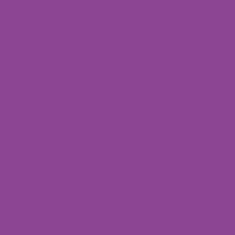

            Purple



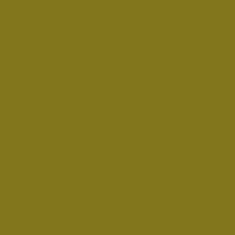

            Green



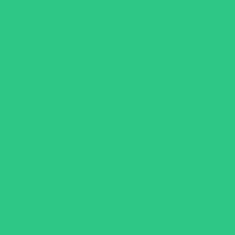

            Green



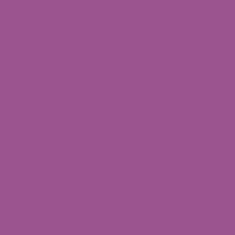

            Purple



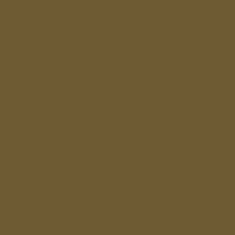

            Brown



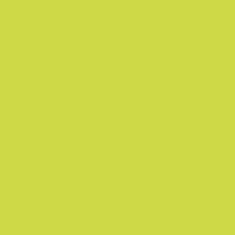

            Yellow



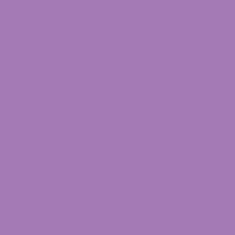

            Purple



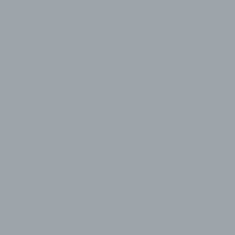

            Grey



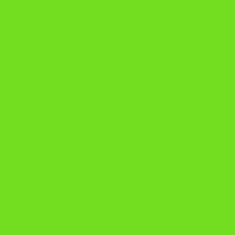

            Green



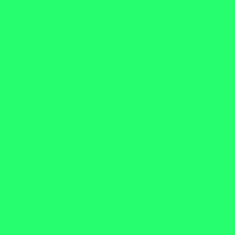

            Green



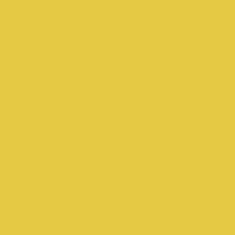

            Yellow



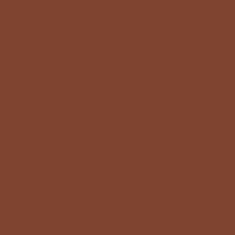

            Brown



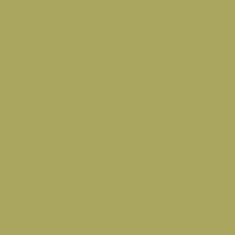

            Green



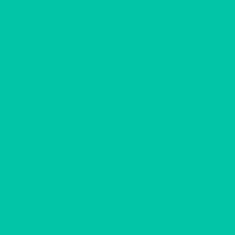

            Green



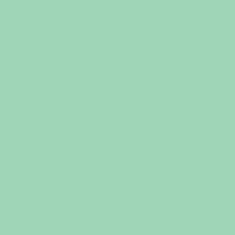

            Green



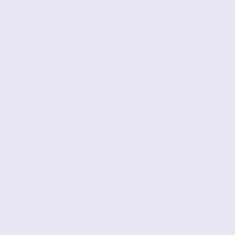

            Grey



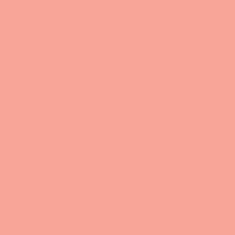

            Orange



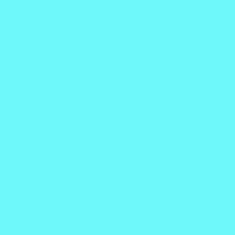

            Blue



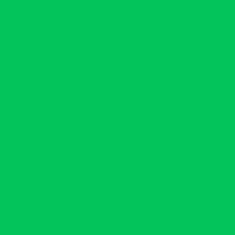

            Green



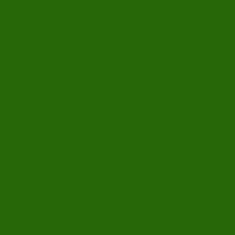

            Green



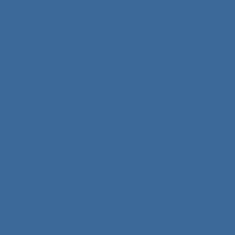

            Blue



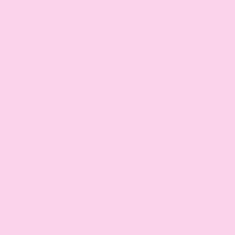

            Pink



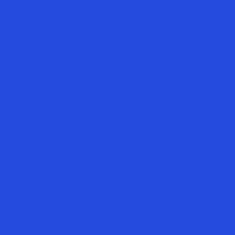

            Blue



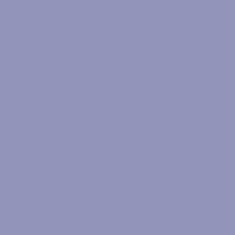

            Grey



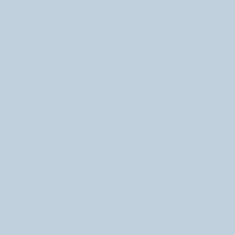

            Grey



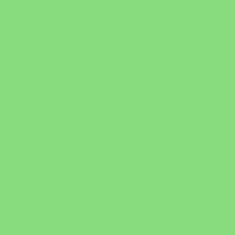

            Green



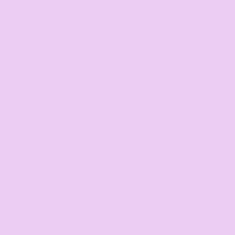

            White



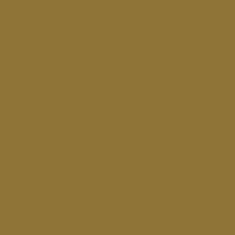

            Brown



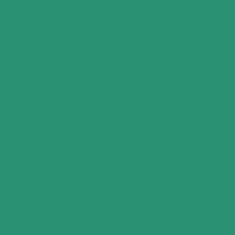

            Green



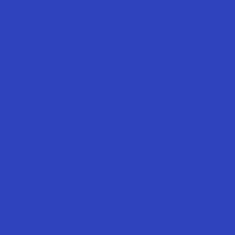

            Blue



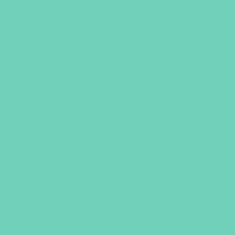

            Green



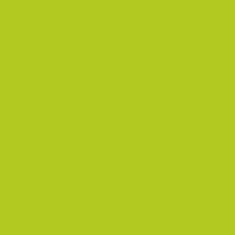

            Green



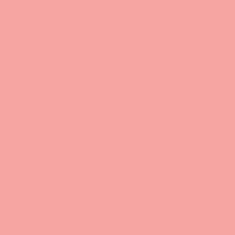

            Orange



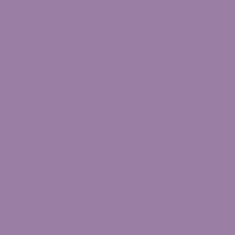

            Purple



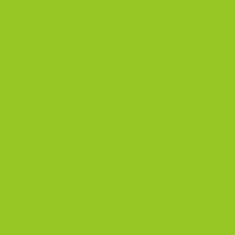

            Green



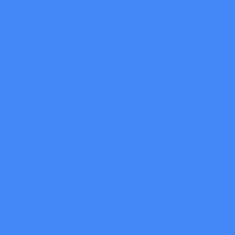

            Blue



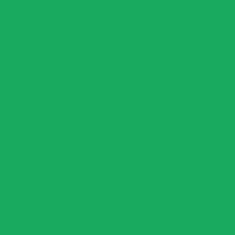

            Green



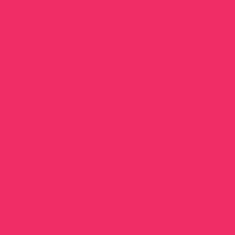

            Red



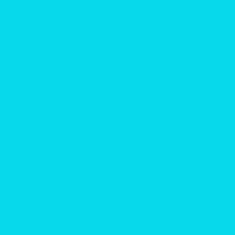

            Blue



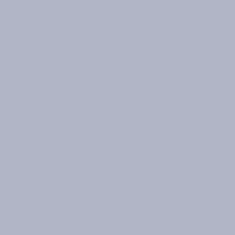

            Grey



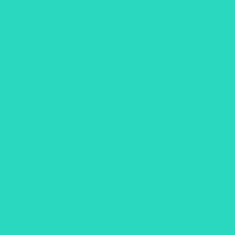

            Green



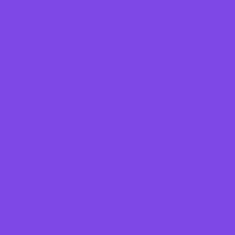

            Purple



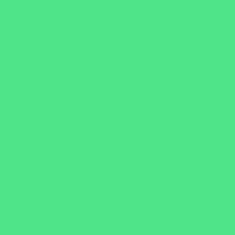

            Green



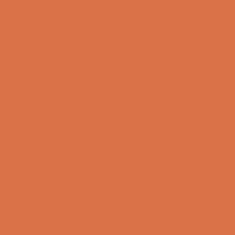

            Orange



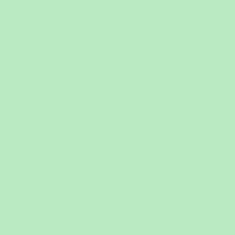

            Green



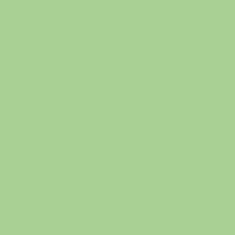

            Green



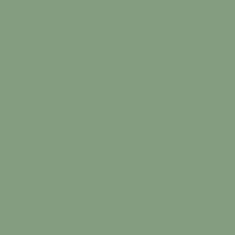

            Grey



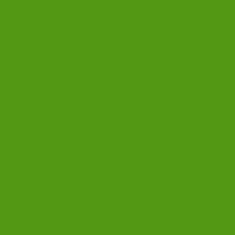

            Green



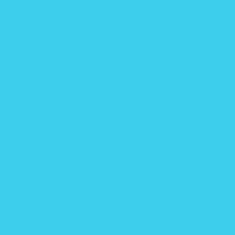

            Blue



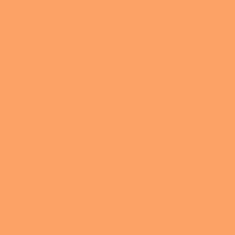

            Orange



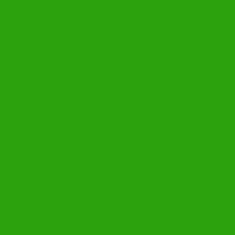

            Green



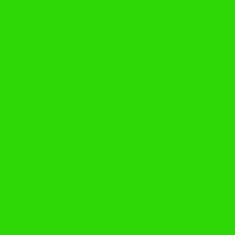

            Green



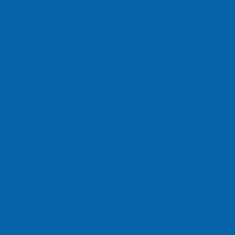

            Blue



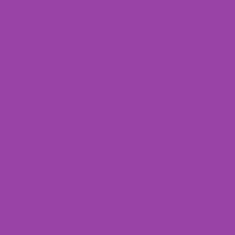

            Purple



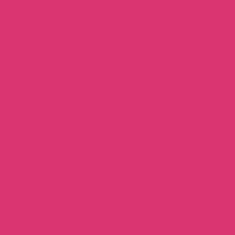

            Pink



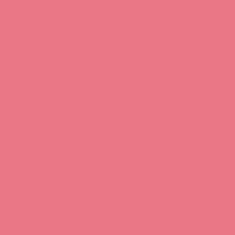

            Red



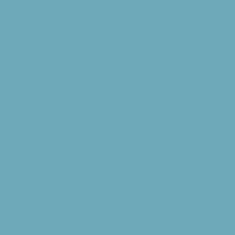

            Blue



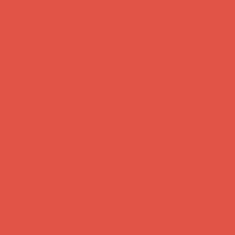

            Red



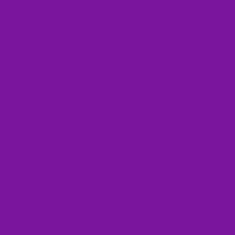

            Purple



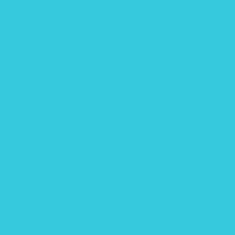

            Blue



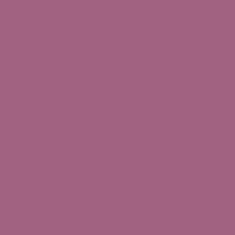

            Purple



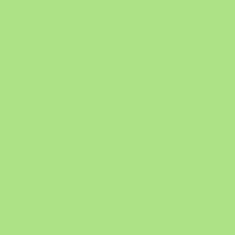

            Green



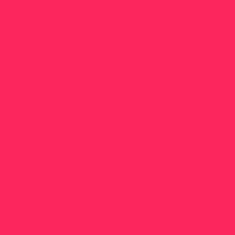

            Red



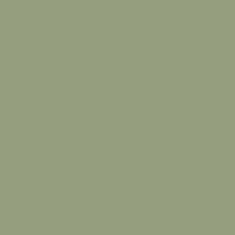

            Grey



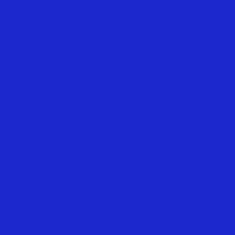

            Blue



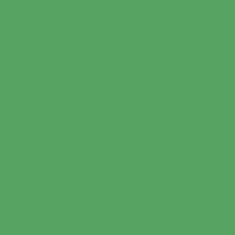

            Green



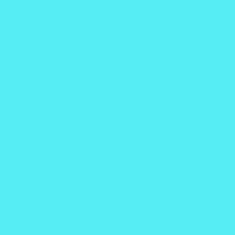

            Blue



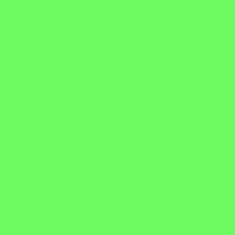

            Green



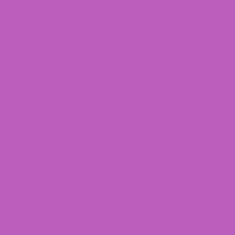

            Pink



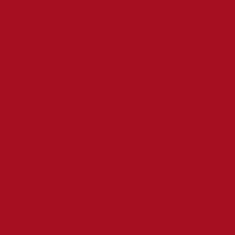

            Red



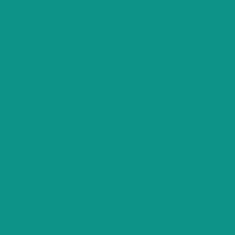

            Green



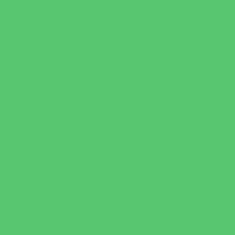

            Green



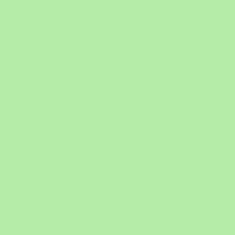

            Green



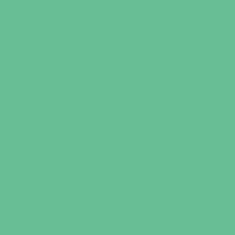

            Green



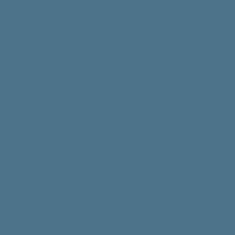

            Blue



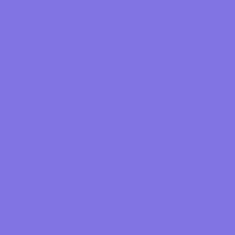

            Purple



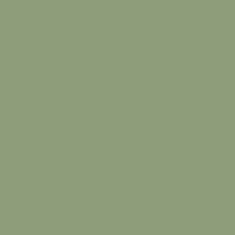

            Grey



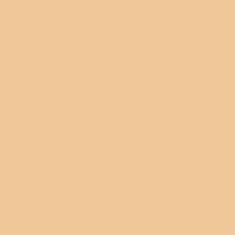

            Orange



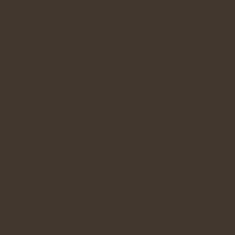

            Grey



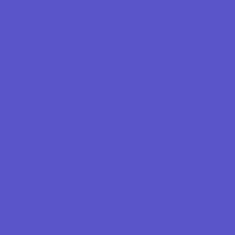

            Blue



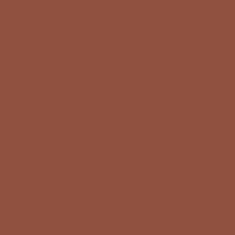

            Brown



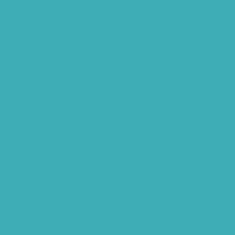

            Blue



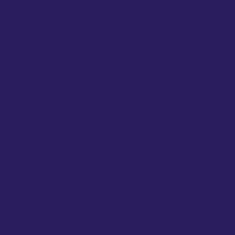

            Blue



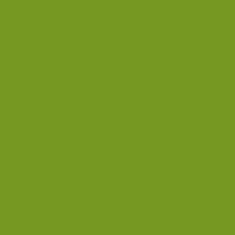

            Green



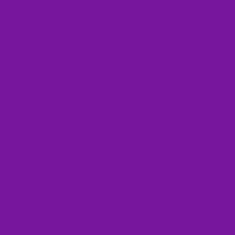

            Purple



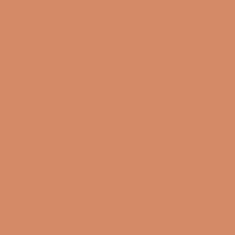

            Brown



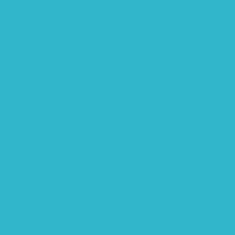

            Blue



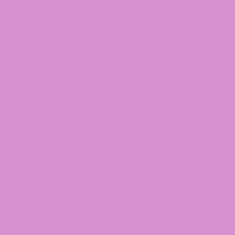

            Pink



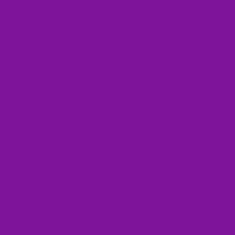

            Purple



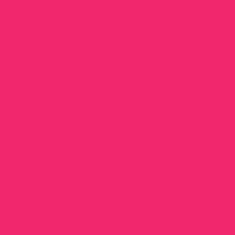

            Pink



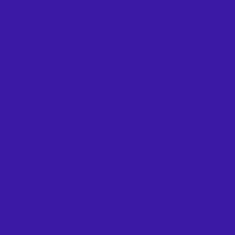

            Blue



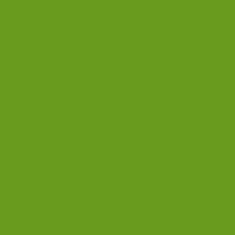

            Green



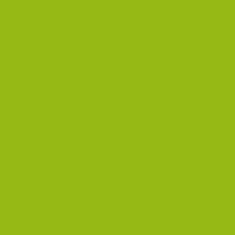

            Green



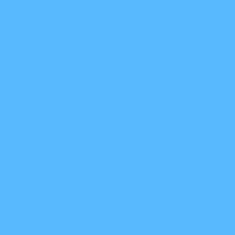

            Blue



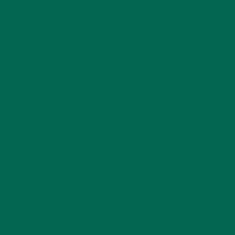

            Green



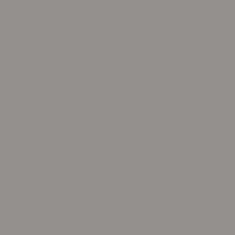

            Grey



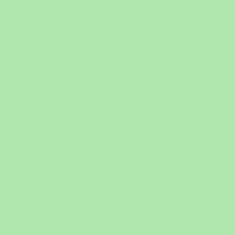

            Green



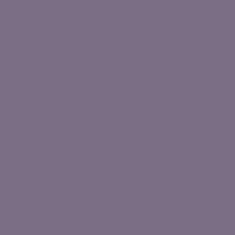

            Grey



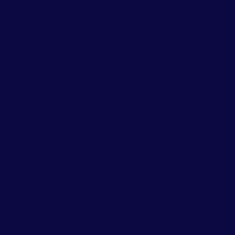

            Blue



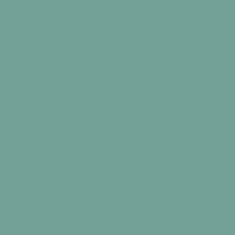

            Grey



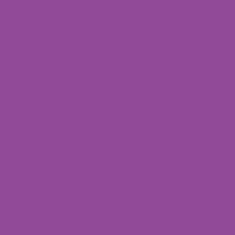

            Purple



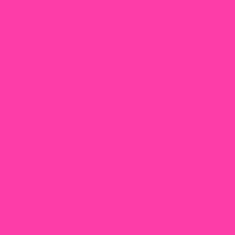

            Pink



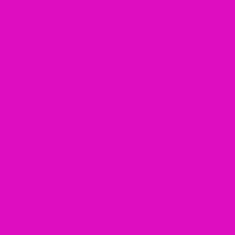

            Pink



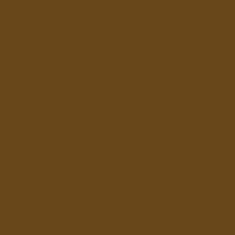

            Brown



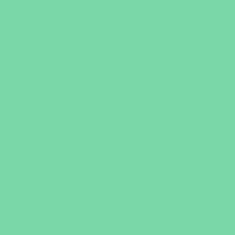

            Green



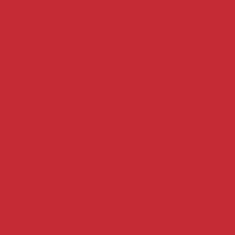

            Red



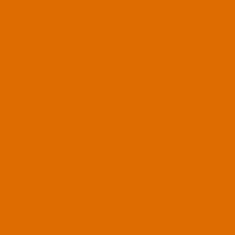

            Orange



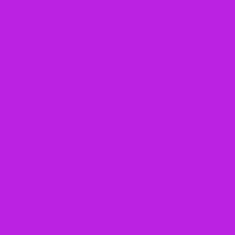

            Purple



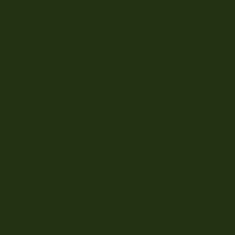

            Green



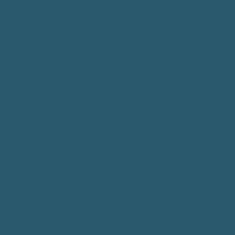

            Blue



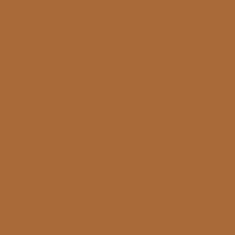

            Brown



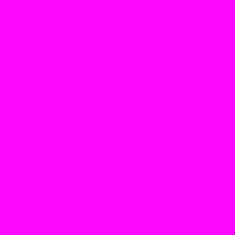

            Pink



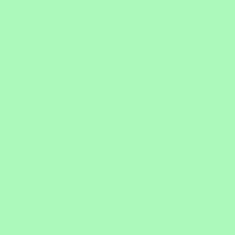

            Green



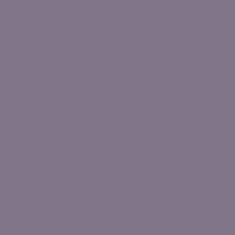

            Grey



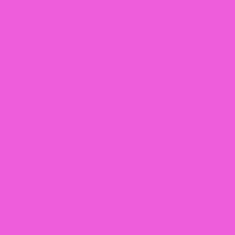

            Pink



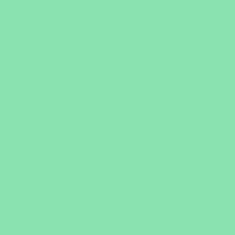

            Green



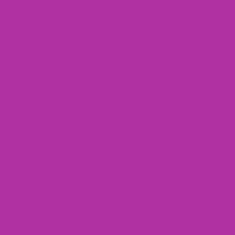

            Purple



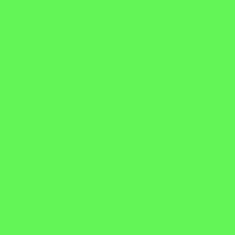

            Green



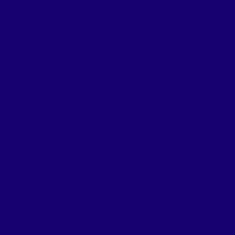

            Blue



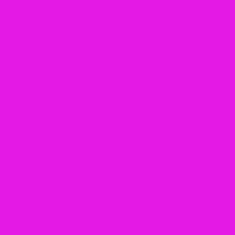

            Pink



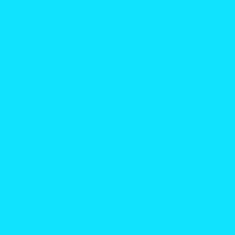

            Blue



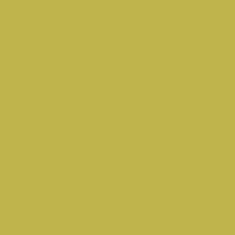

            Yellow



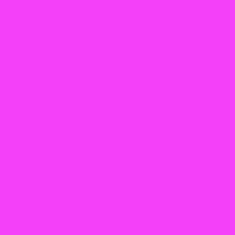

            Pink



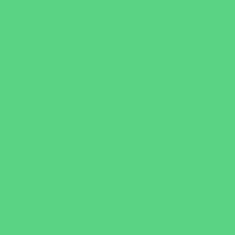

            Green



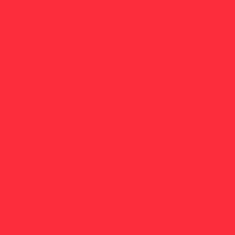

            Red



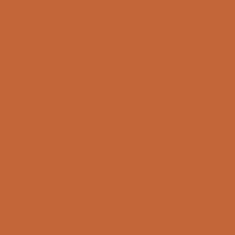

            Brown



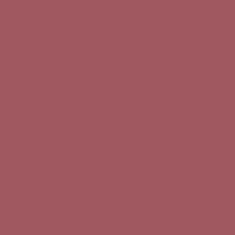

            Brown



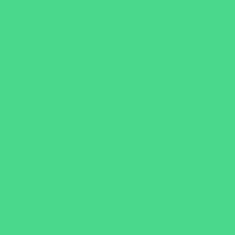

            Green



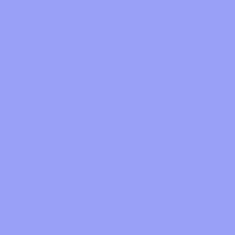

            Blue



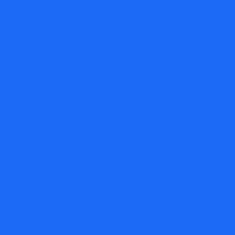

            Blue



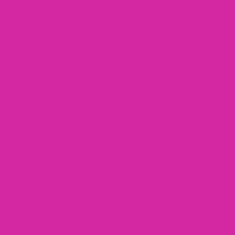

            Pink



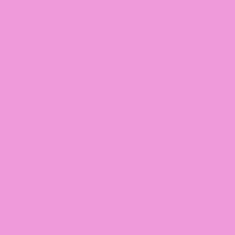

            Pink



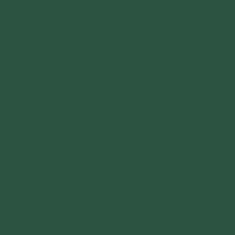

            Green



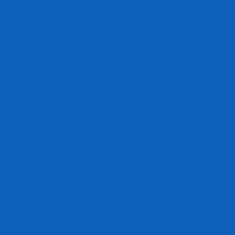

            Blue



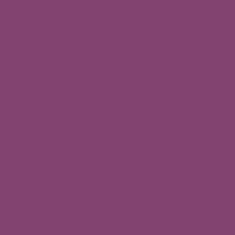

            Purple



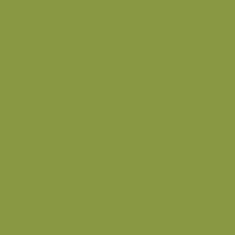

            Green



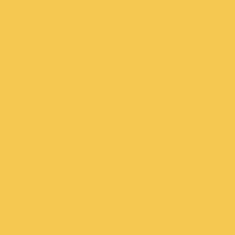

            Orange



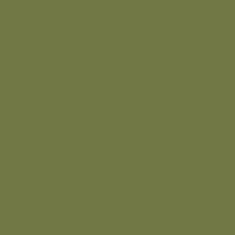

            Green



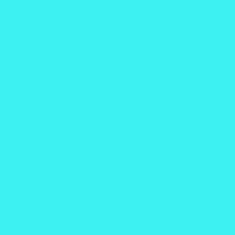

            Blue



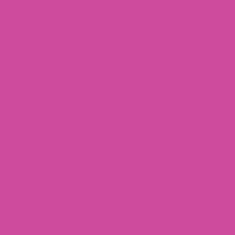

            Pink



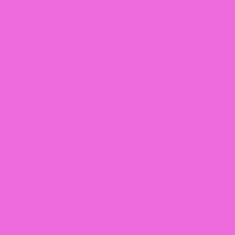

            Pink



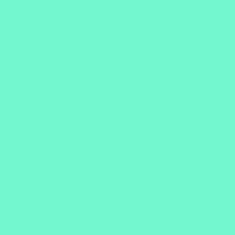

            Green



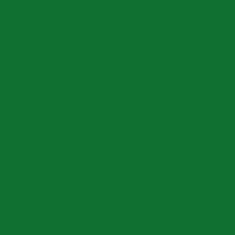

            Green



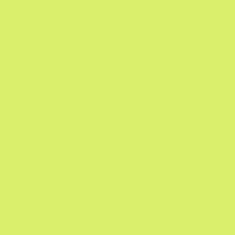

            Yellow



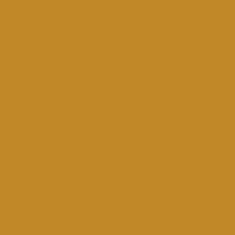

            Brown



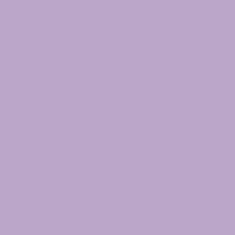

            Purple



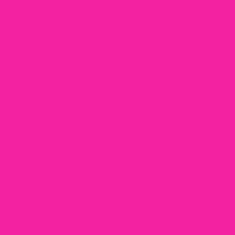

            Pink



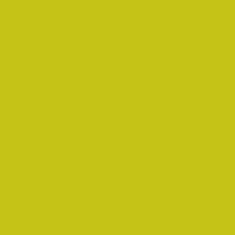

            Yellow



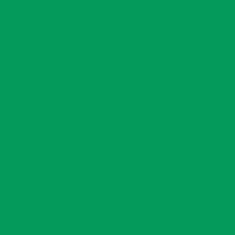

            Green



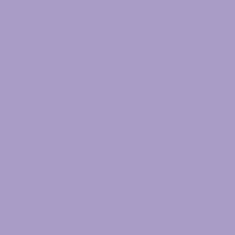

            Purple



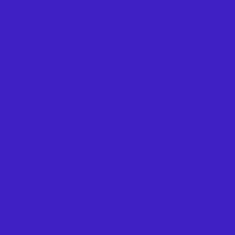

            Blue



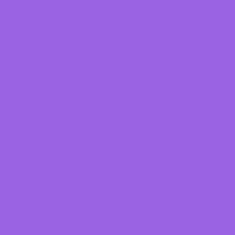

            Purple



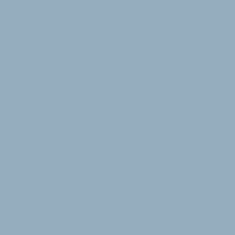

            Grey



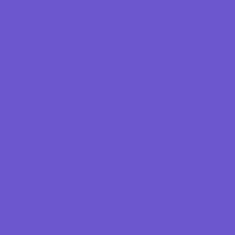

            Purple



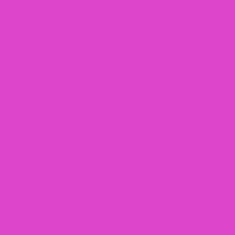

            Pink



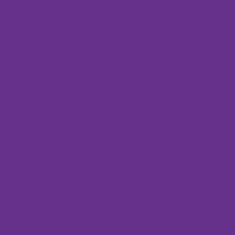

            Purple



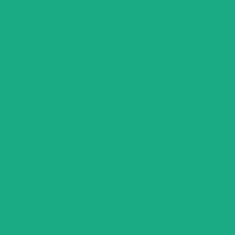

            Green



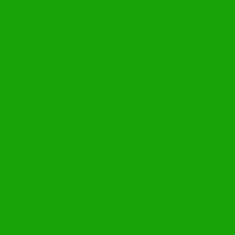

            Green



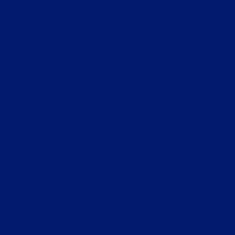

            Blue



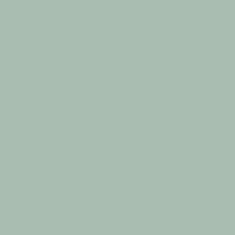

            Grey



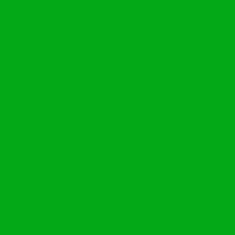

            Green



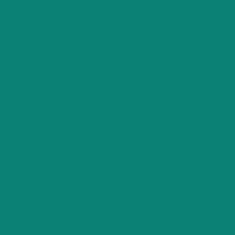

            Green



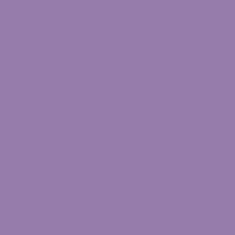

            Purple



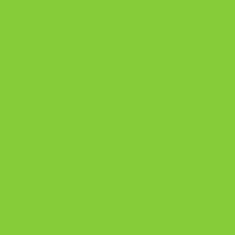

            Green



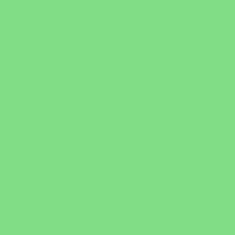

            Green



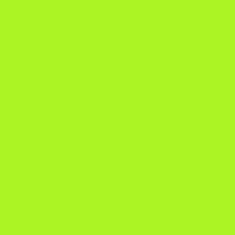

            Green



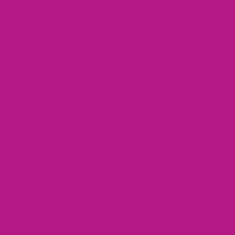

            Pink



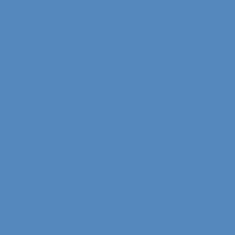

            Blue



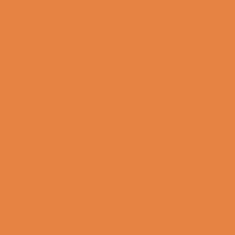

            Orange



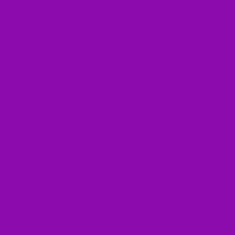

            Purple



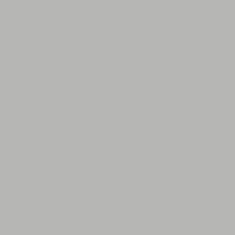

            Grey



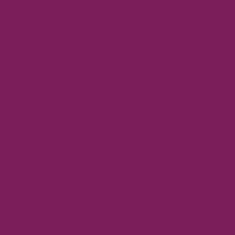

            Purple



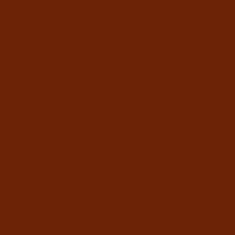

            Brown



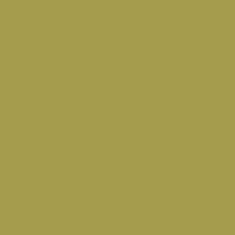

            Green



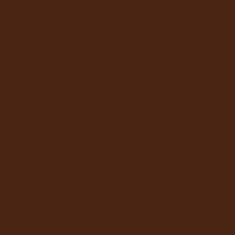

            Brown



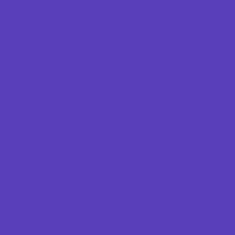

            Blue



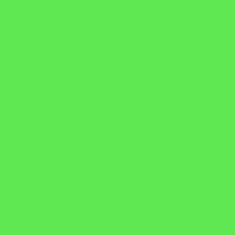

            Green



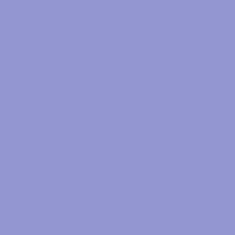

            Blue



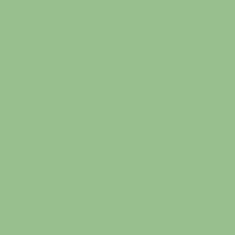

            Green



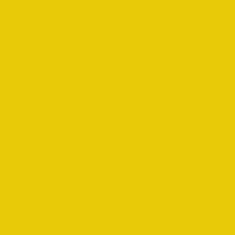

            Yellow



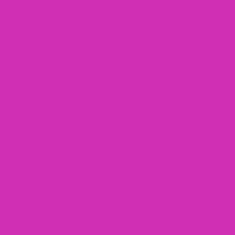

            Pink



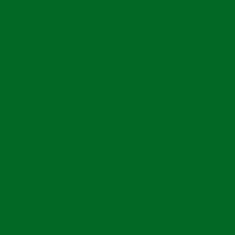

            Green



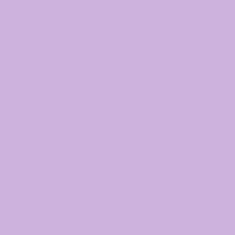

            Purple



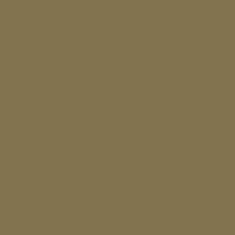

            Brown



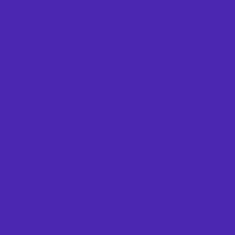

            Blue



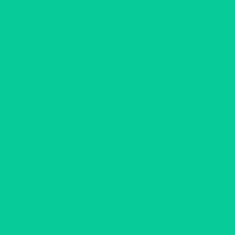

            Green



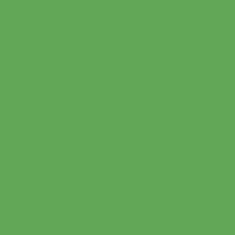

            Green



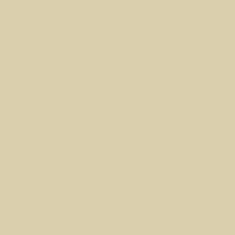

            Brown



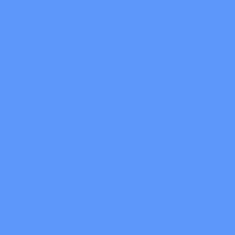

            Blue



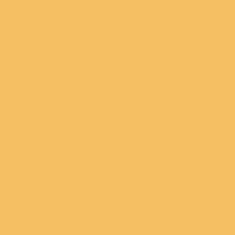

            Orange



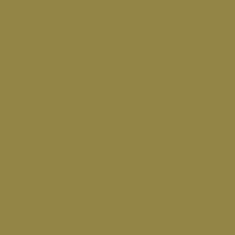

            Brown



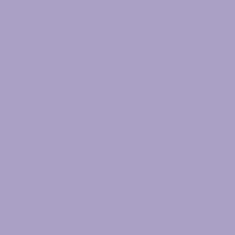

            Purple



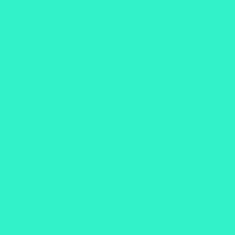

            Green



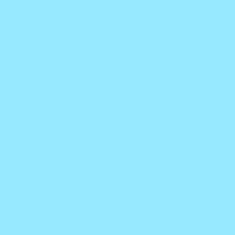

            Blue



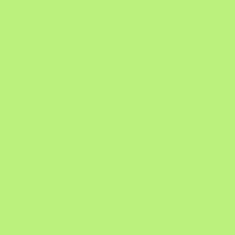

            Green



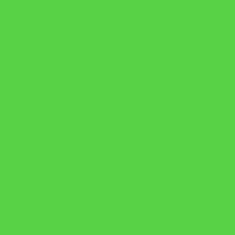

            Green



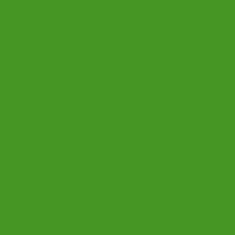

            Green



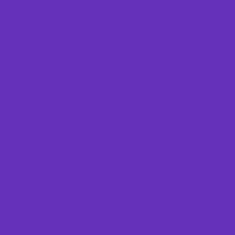

            Purple



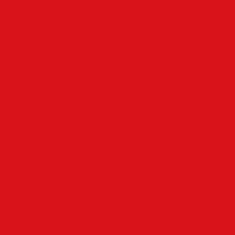

            Red



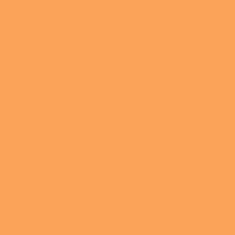

            Orange



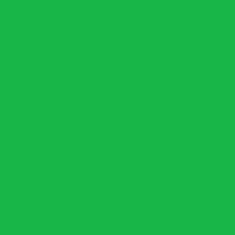

            Green



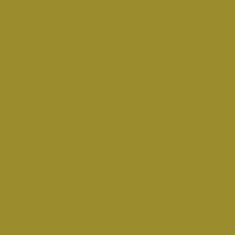

            Green



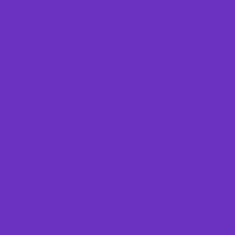

            Purple



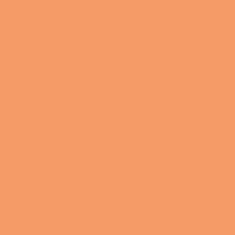

            Orange



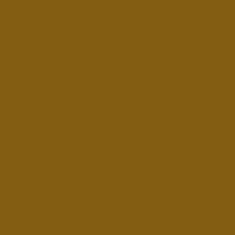

            Brown



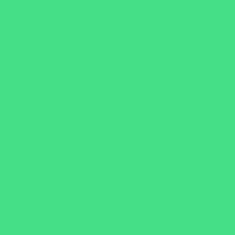

            Green



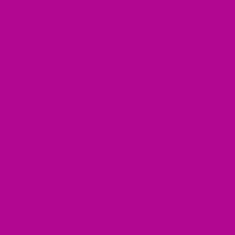

            Pink



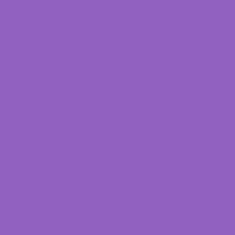

            Purple



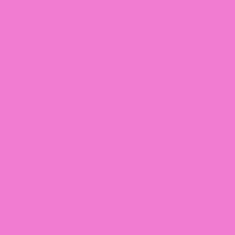

            Pink



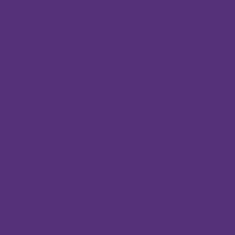

            Purple



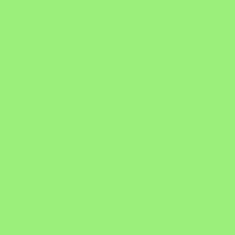

            Green



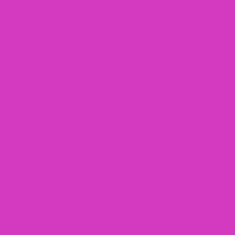

            Pink



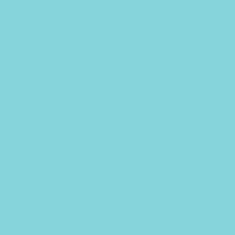

            Blue



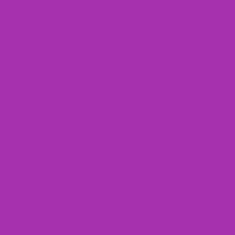

            Purple



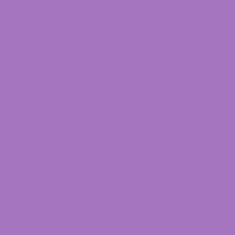

            Purple



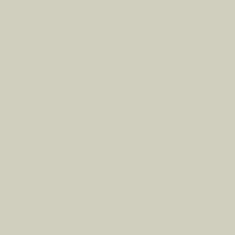

            Grey



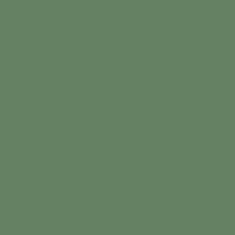

            Grey



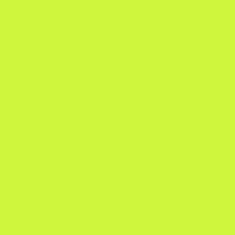

            Yellow



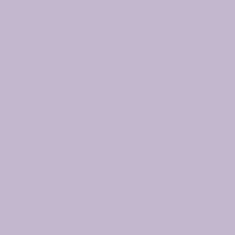

            Grey



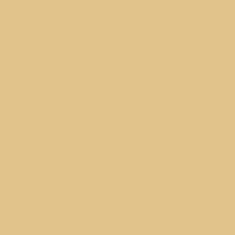

            Yellow



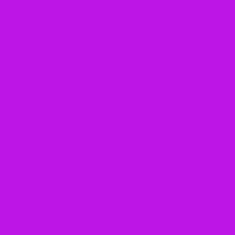

            Pink



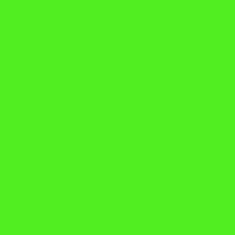

            Green



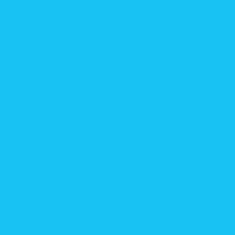

            Blue



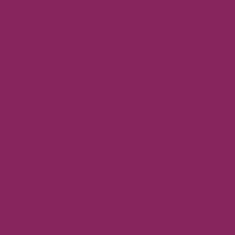

            Purple



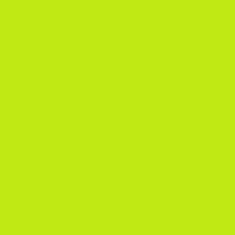

            Yellow



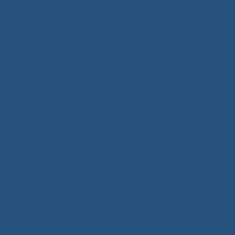

            Blue



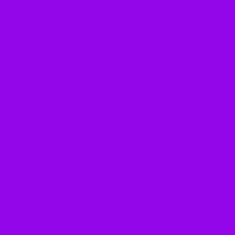

            Purple



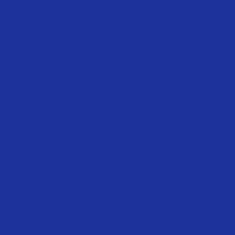

            Blue



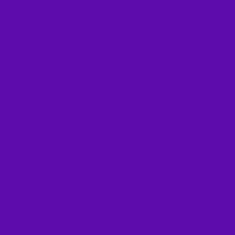

            Purple



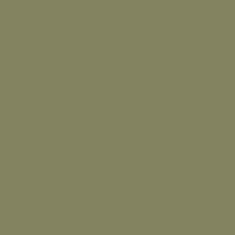

            Grey



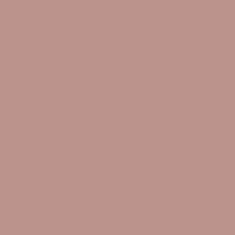

            Brown



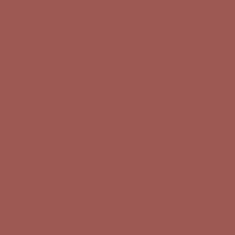

            Brown



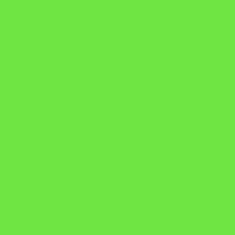

            Green



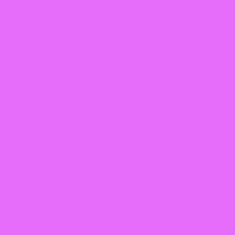

            Pink



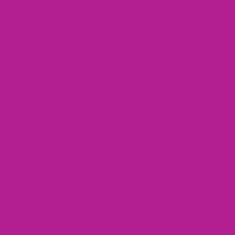

            Pink



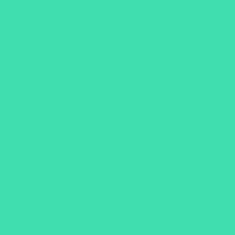

            Green



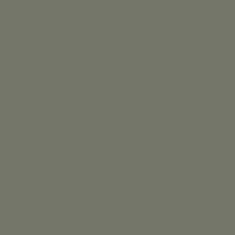

            Grey



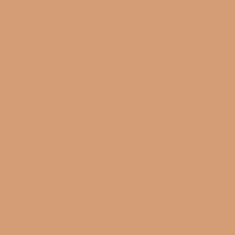

            Brown



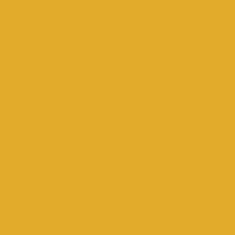

            Orange



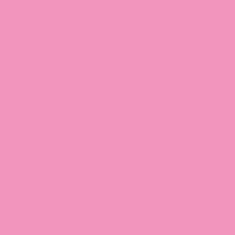

            Pink



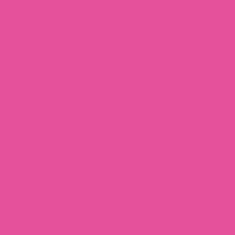

            Pink



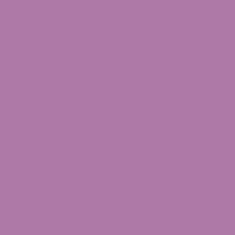

            Purple



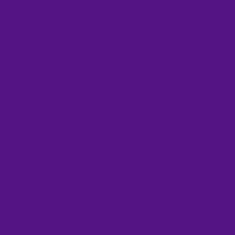

            Purple



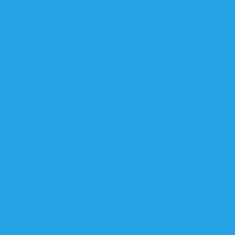

            Blue



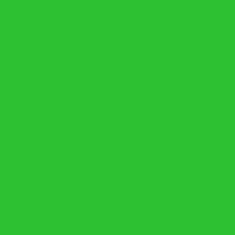

            Green



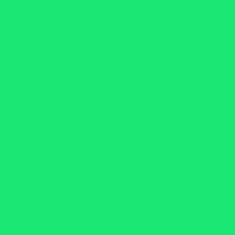

            Green



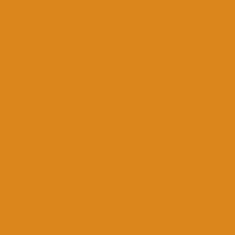

            Orange



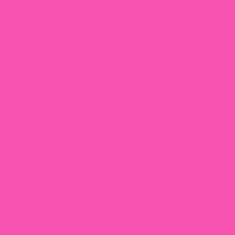

            Pink



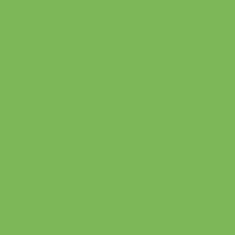

            Green



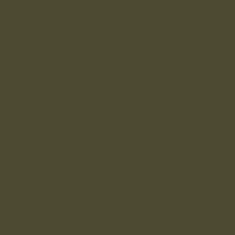

            Grey



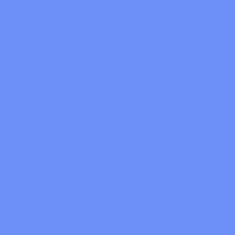

            Blue



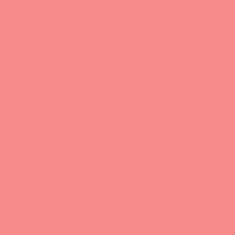

            Red



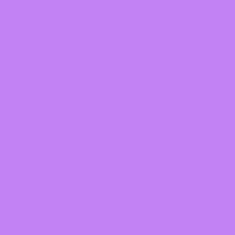

            Purple



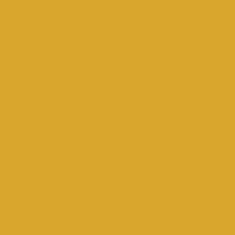

            Orange



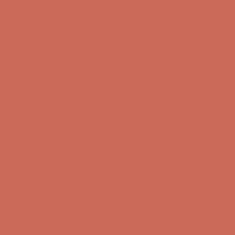

            Red



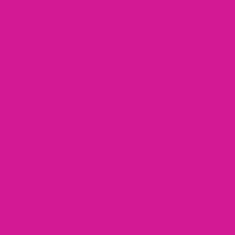

            Pink



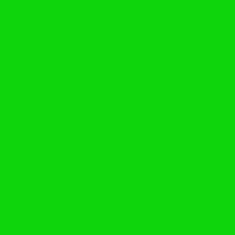

            Green



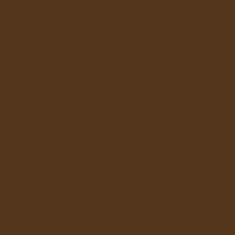

            Brown



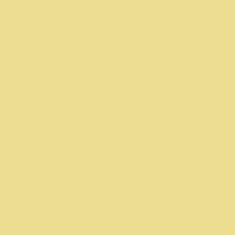

            Yellow



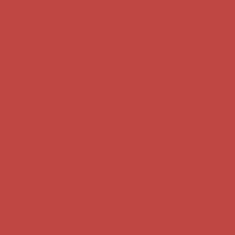

            Red



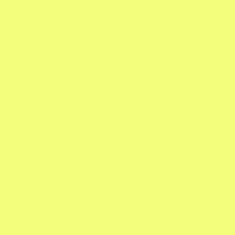

            Yellow



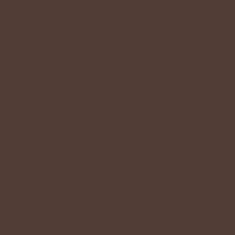

            Brown



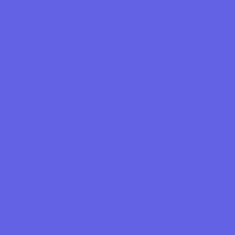

            Blue



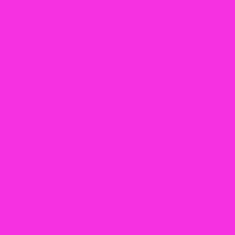

            Pink



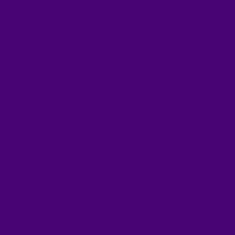

            Purple



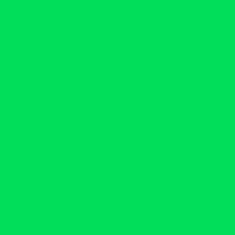

            Green



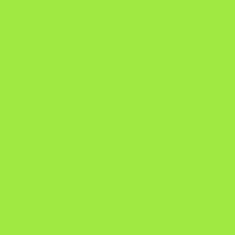

            Green



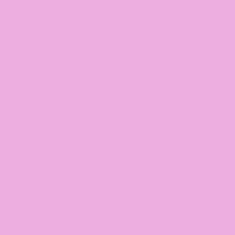

            Pink



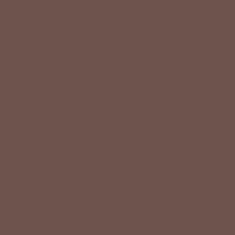

            Brown



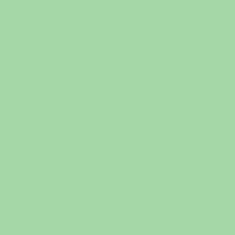

            Green



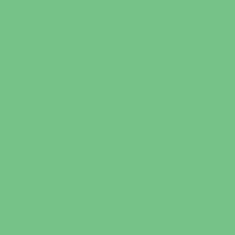

            Green



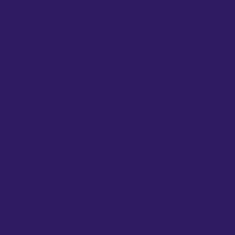

            Blue



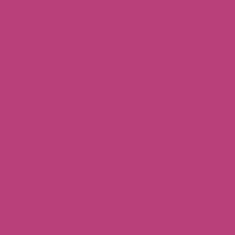

            Pink



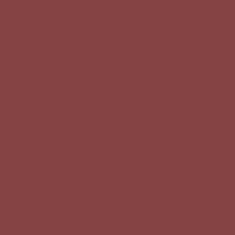

            Brown



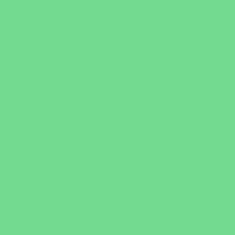

            Green



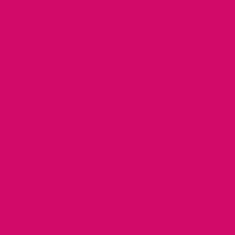

            Pink



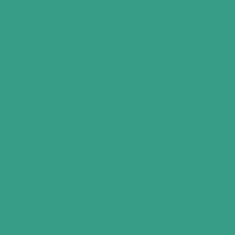

            Green



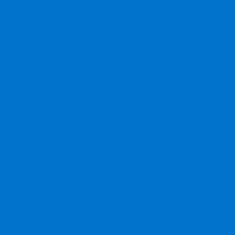

            Blue



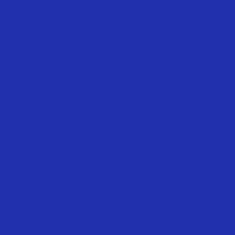

            Blue



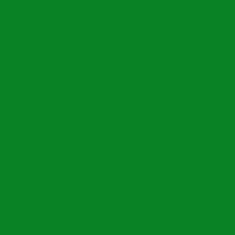

            Green



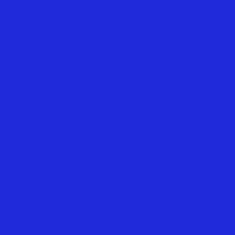

            Blue



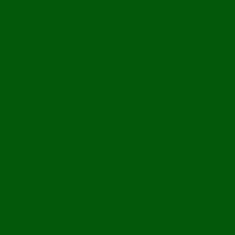

            Green



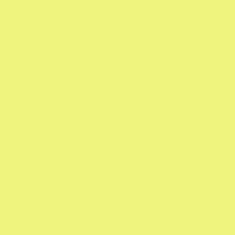

            Yellow



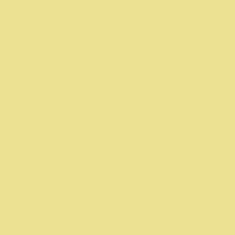

            Yellow



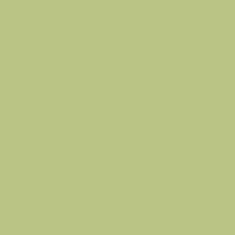

            Green



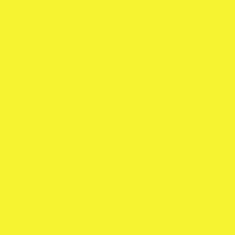

            Yellow



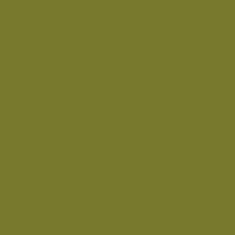

            Green



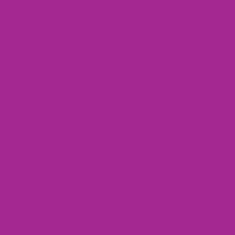

            Purple



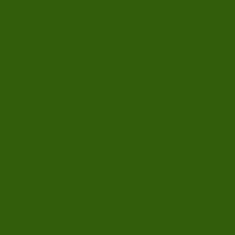

            Green



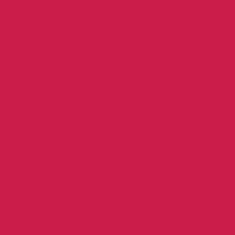

            Red



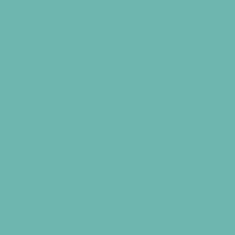

            Green



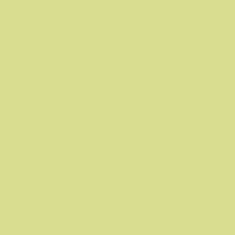

            Yellow



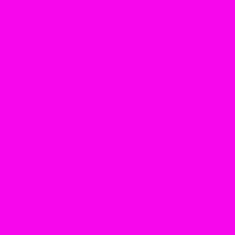

            Pink



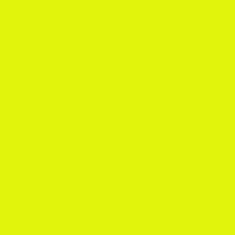

            Yellow



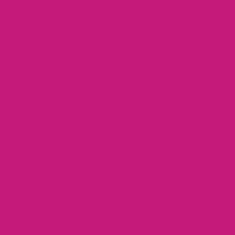

            Pink



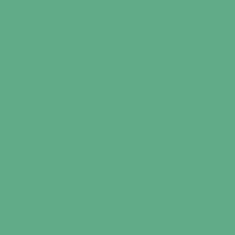

            Green



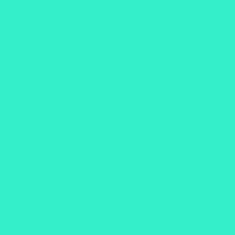

            Green



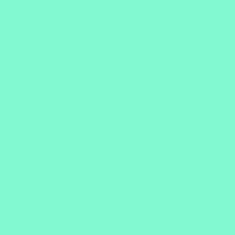

            Green



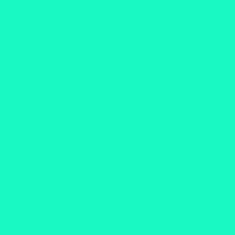

            Green



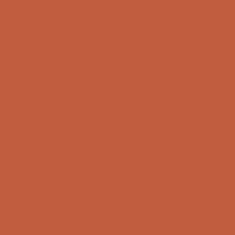

            Brown



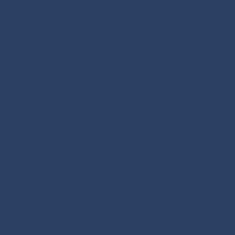

            Blue



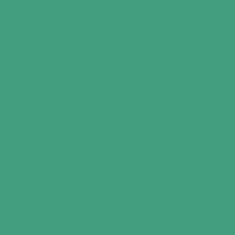

            Green



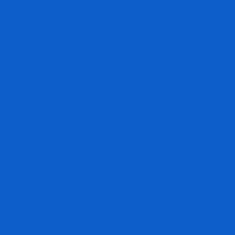

            Blue



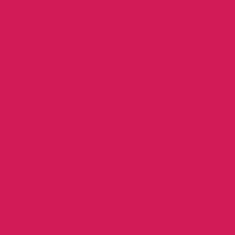

            Red



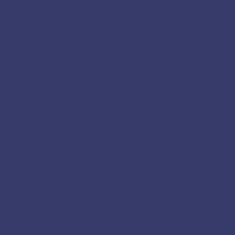

            Blue



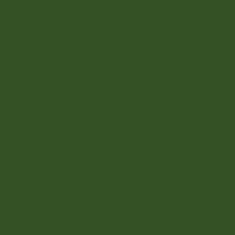

            Green



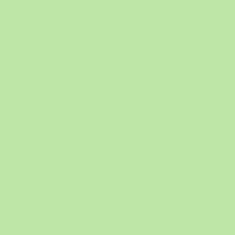

            Green



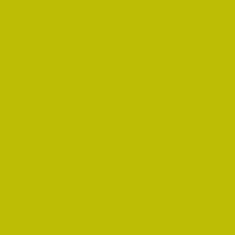

            Yellow



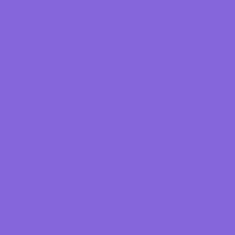

            Purple



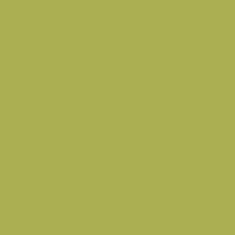

            Green



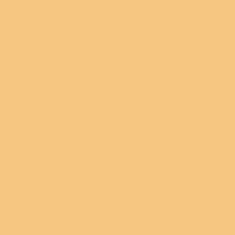

            Orange



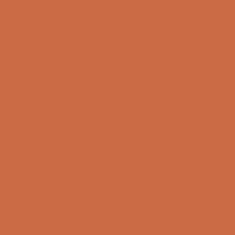

            Orange



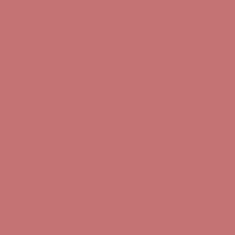

            Brown



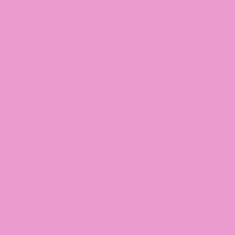

            Pink



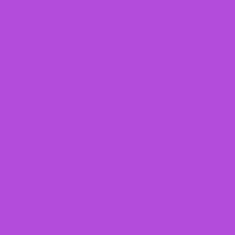

            Purple



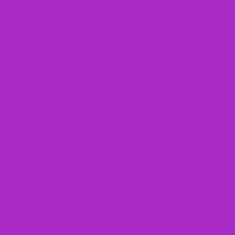

            Purple



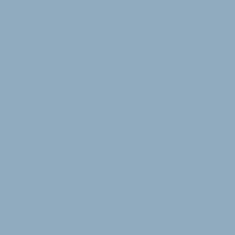

            Grey



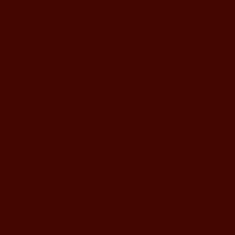

            Brown



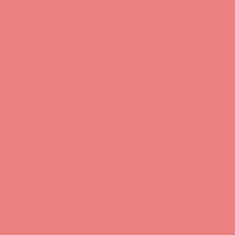

            Red



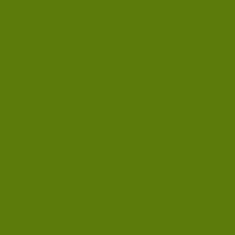

            Green



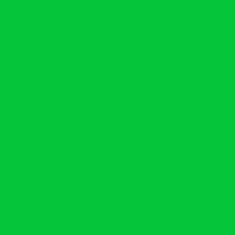

            Green



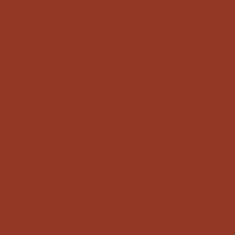

            Brown



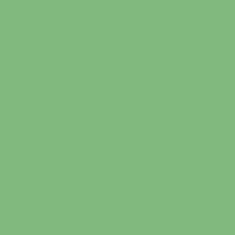

            Green



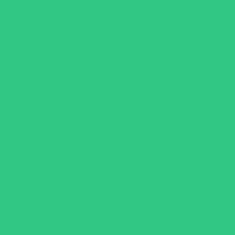

            Green



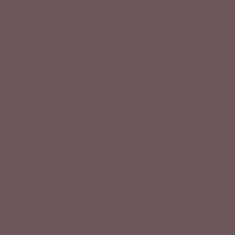

            Brown



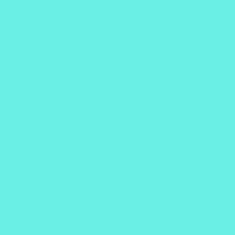

            Blue



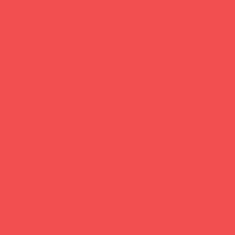

            Red



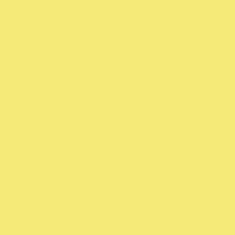

            Yellow



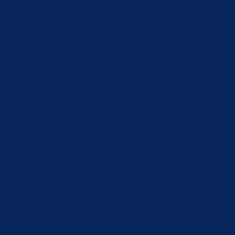

            Blue



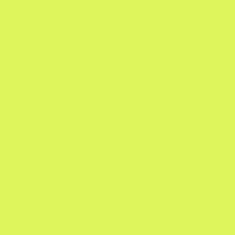

            Yellow



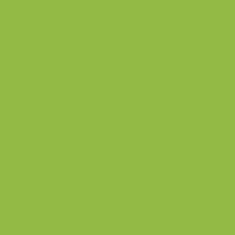

            Green



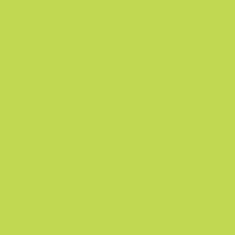

            Green



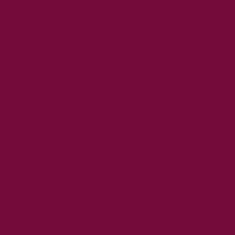

            Brown



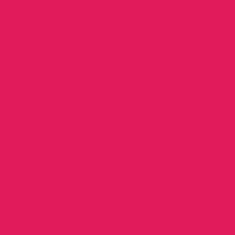

            Red



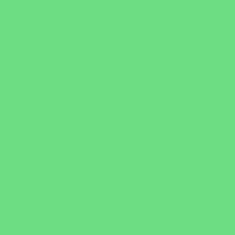

            Green



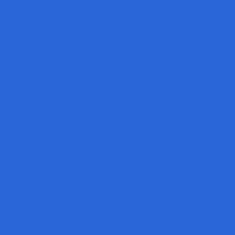

            Blue



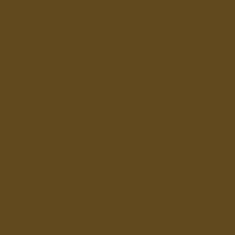

            Brown



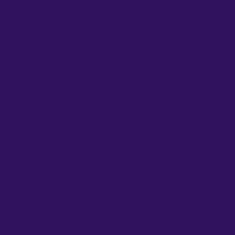

            Blue



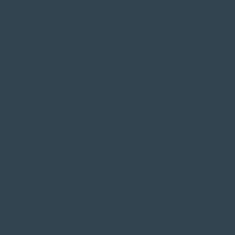

            Grey



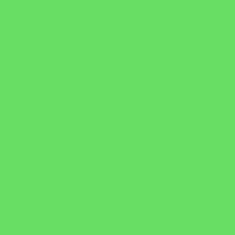

            Green



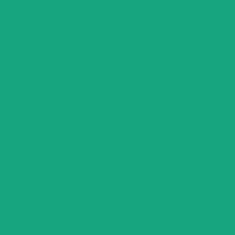

            Green



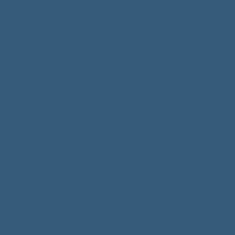

            Blue



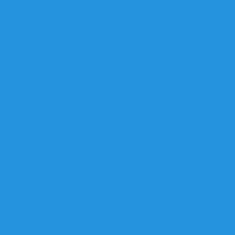

            Blue



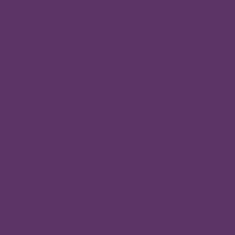

            Purple



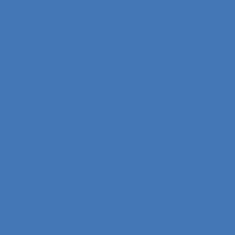

            Blue



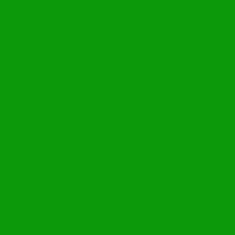

            Green



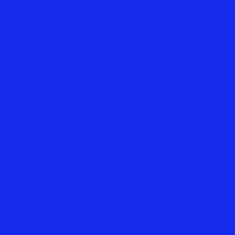

            Blue



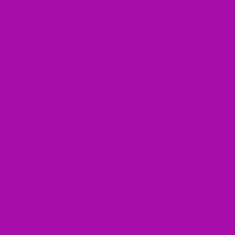

            Purple



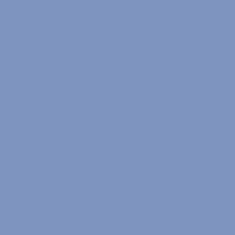

            Blue



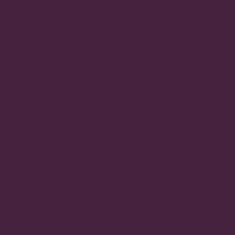

            Brown



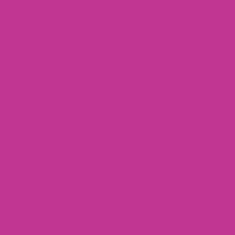

            Pink



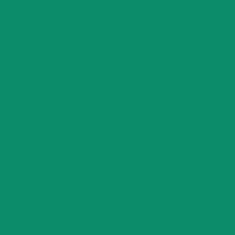

            Green



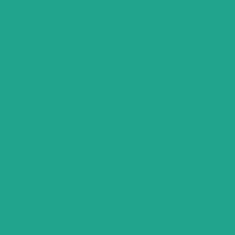

            Green



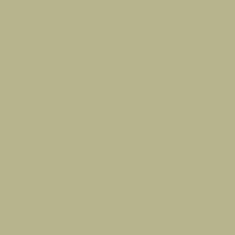

            Grey



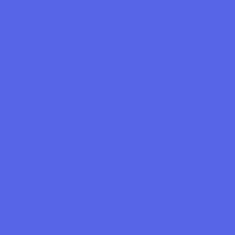

            Blue



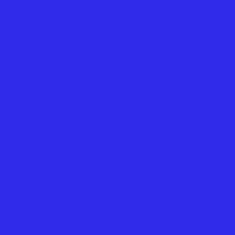

            Blue



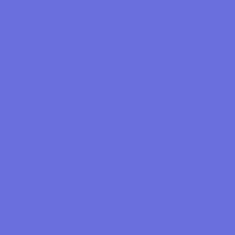

            Blue



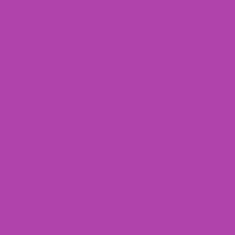

            Purple



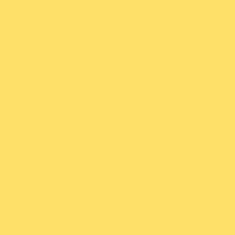

            Yellow



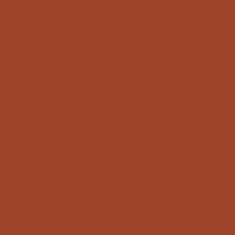

            Brown



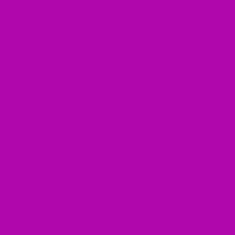

            Purple



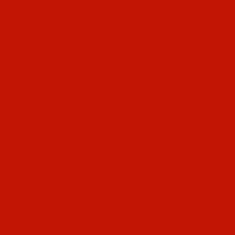

            Red



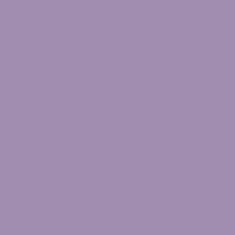

            Purple



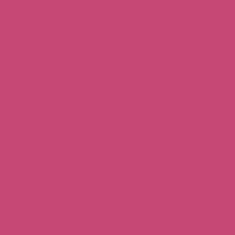

            Pink



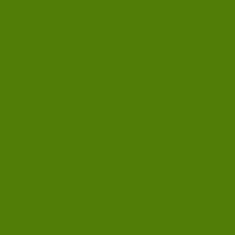

            Green



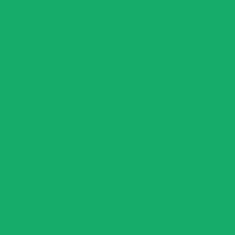

            Green



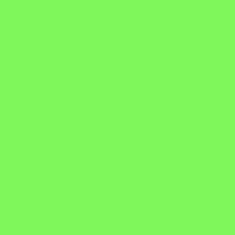

            Green



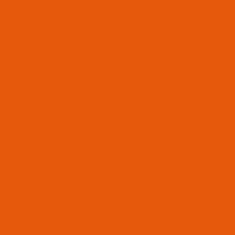

            Orange



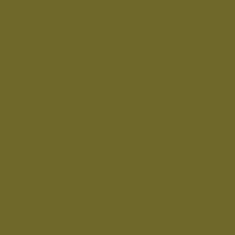

            Brown



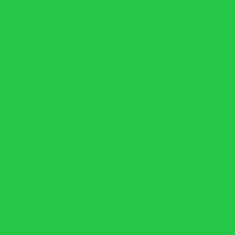

            Green



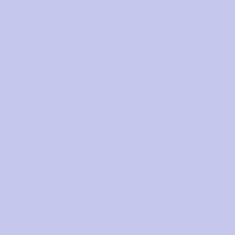

            Purple



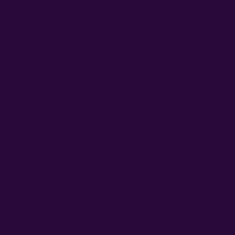

            Purple



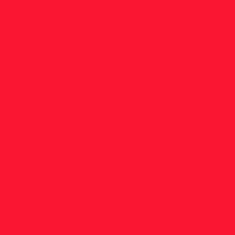

            Red



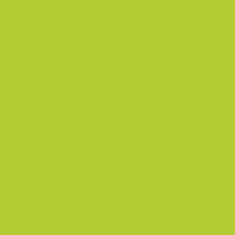

            Green



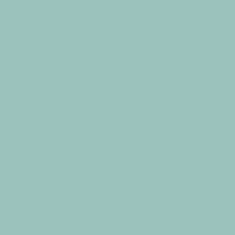

            Grey



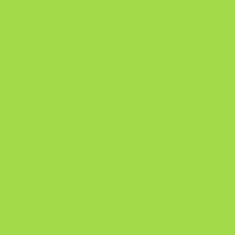

            Green



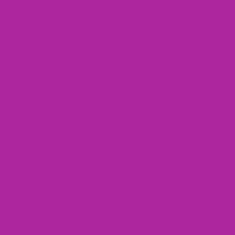

            Purple



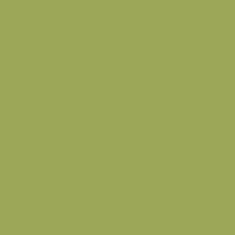

            Green



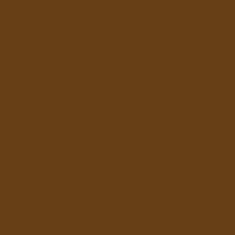

            Brown



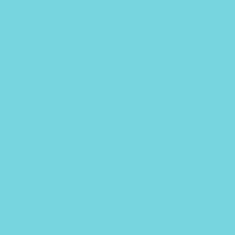

            Blue



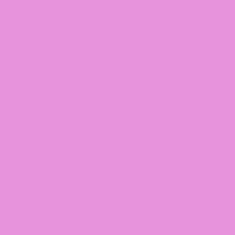

            Pink



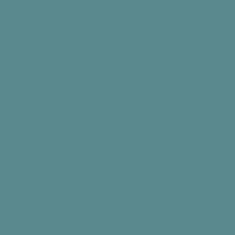

            Blue



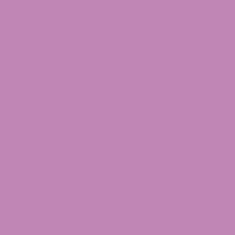

            Purple



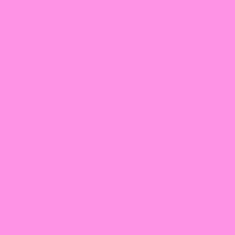

            Pink



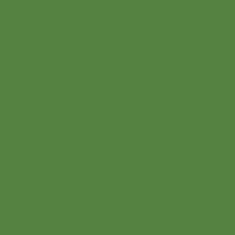

            Green



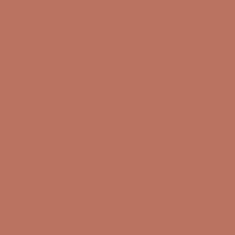

            Brown



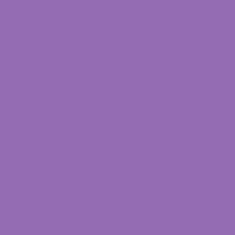

            Purple



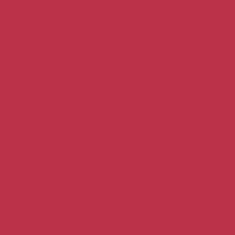

            Red



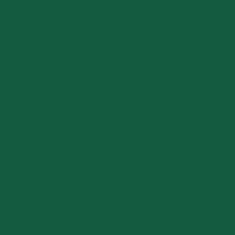

            Green



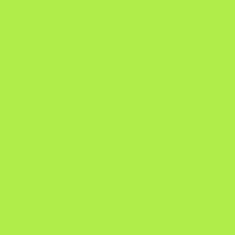

            Green



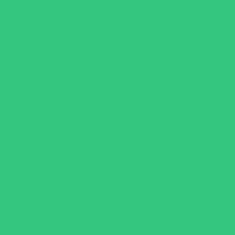

            Green



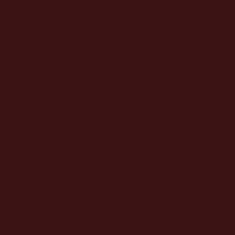

            Brown



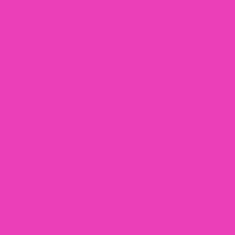

            Pink



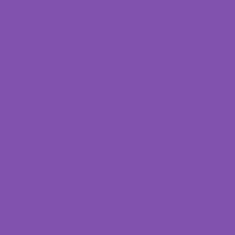

            Purple



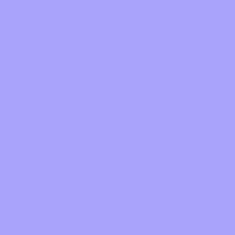

            Purple



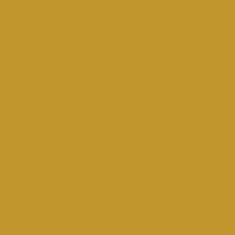

            Yellow



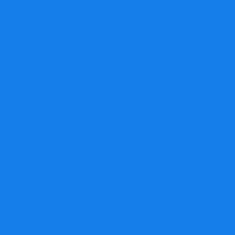

            Blue



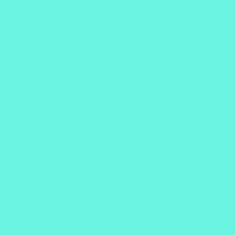

            Blue



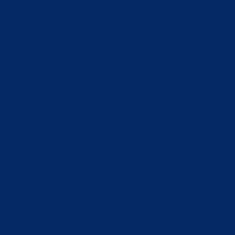

            Blue



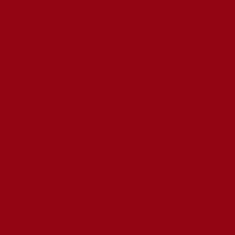

            Red



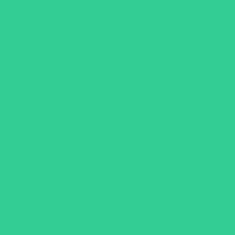

            Green



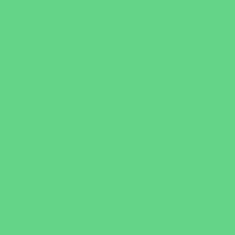

            Green



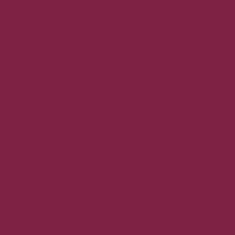

            Brown



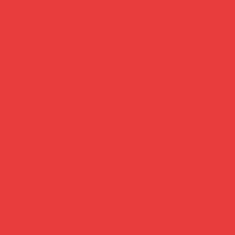

            Red



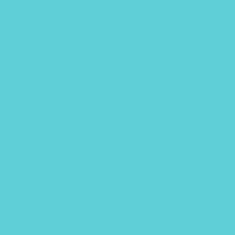

            Blue



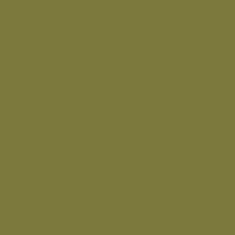

            Green



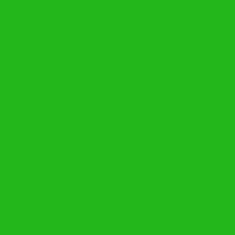

            Green



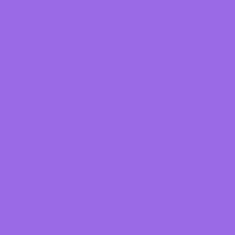

            Purple



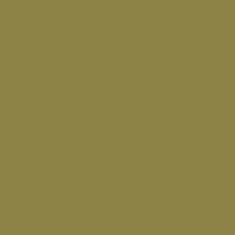

            Brown



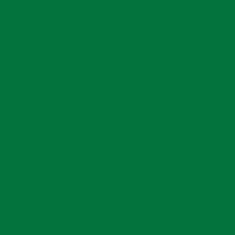

            Green



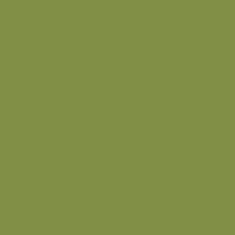

            Green



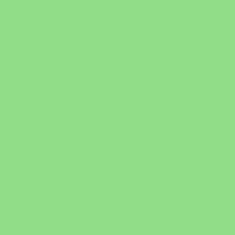

            Green



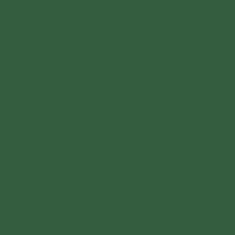

            Green



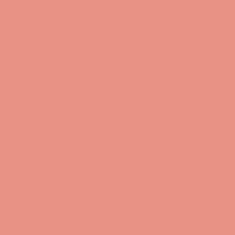

            Red



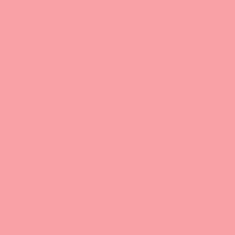

            Orange



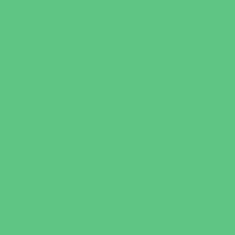

            Green



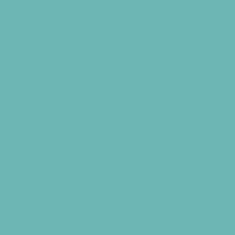

            Green



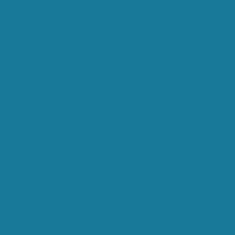

            Blue



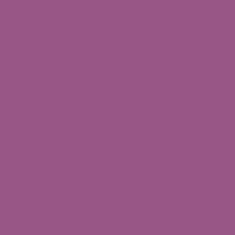

            Purple



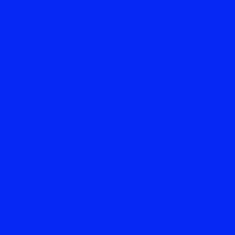

            Blue



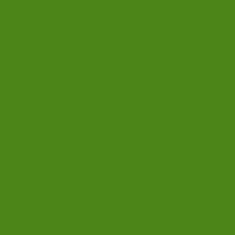

            Green



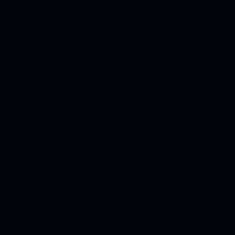

            Black



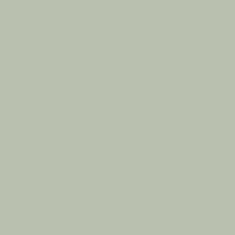

            Grey



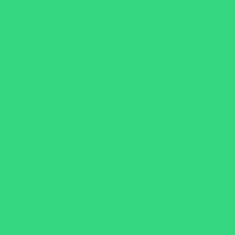

            Green



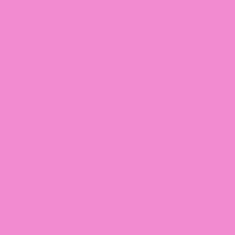

            Pink



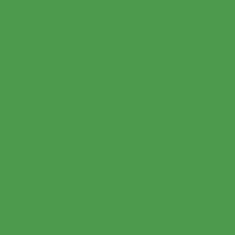

            Green



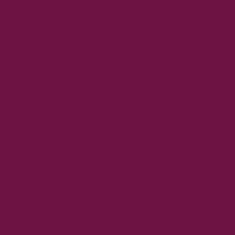

            Brown



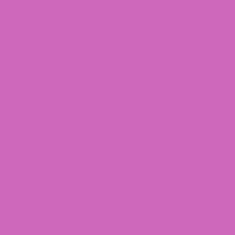

            Pink



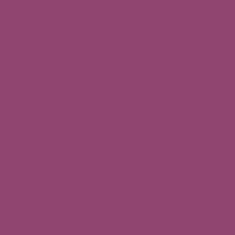

            Purple



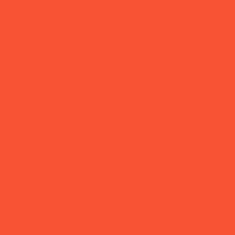

            Orange



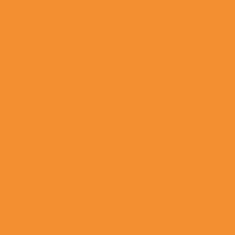

            Orange



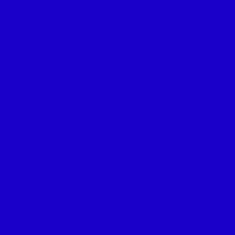

            Blue



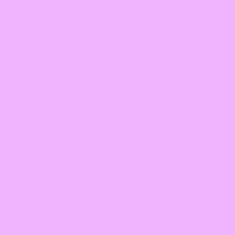

            Pink



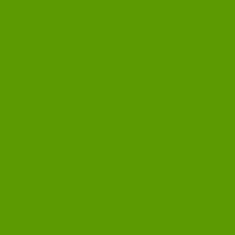

            Green



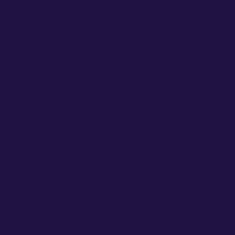

            Blue



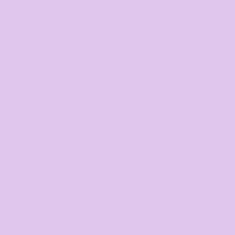

            White



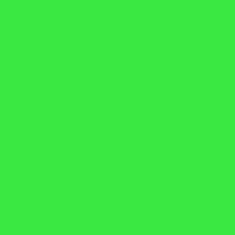

            Green



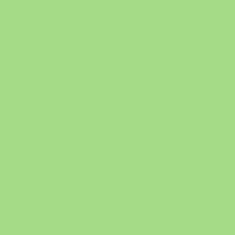

            Green



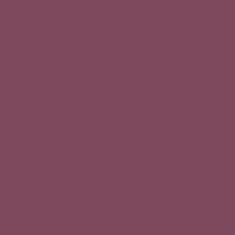

            Brown



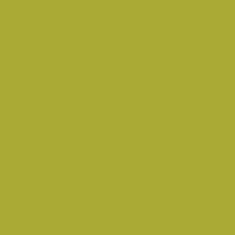

            Green



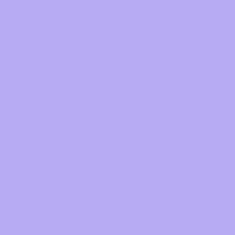

            Purple



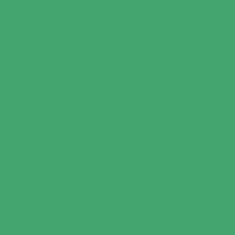

            Green



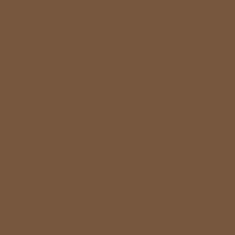

            Brown



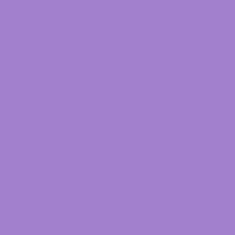

            Purple



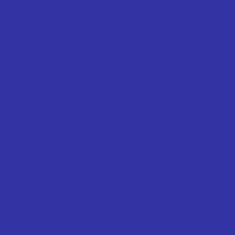

            Blue



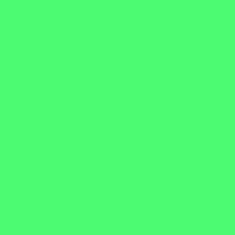

            Green



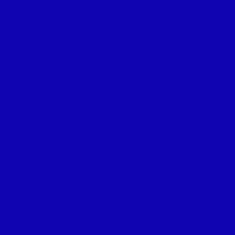

            Blue



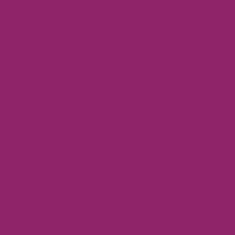

            Purple



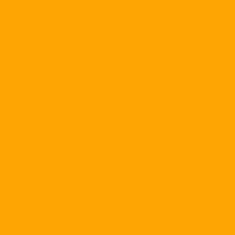

            Orange



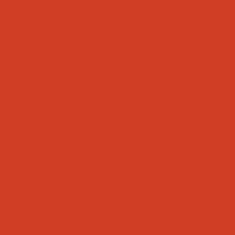

            Red



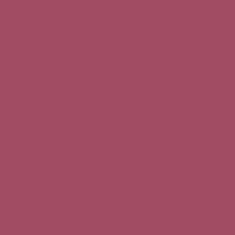

            Brown



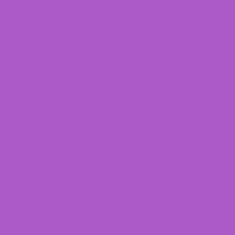

            Purple



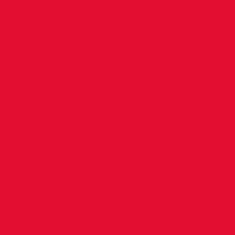

            Red



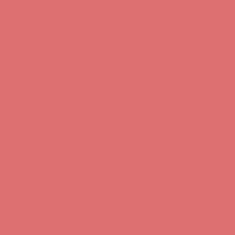

            Red



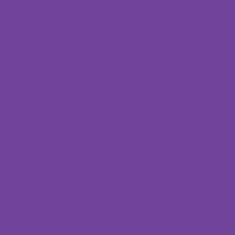

            Purple



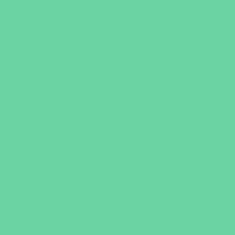

            Green



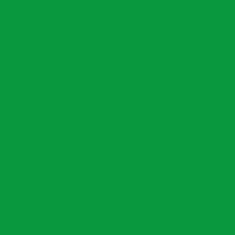

            Green



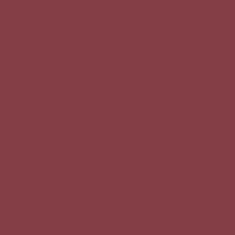

            Brown



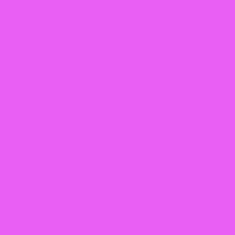

            Pink



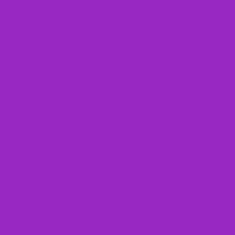

            Purple



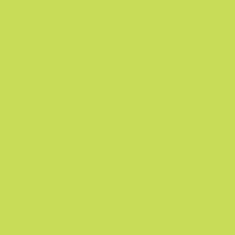

            Yellow



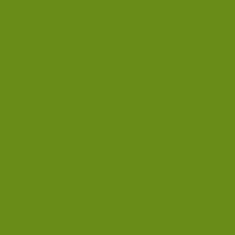

            Green



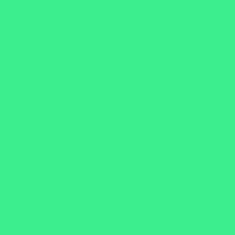

            Green



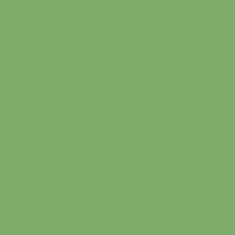

            Green



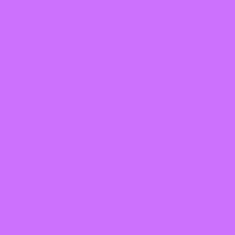

            Pink



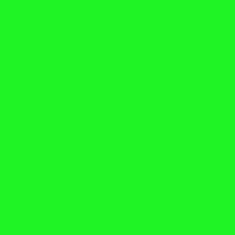

            Green



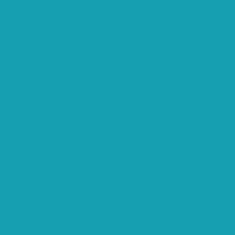

            Blue



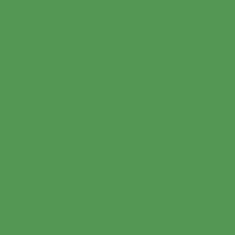

            Green



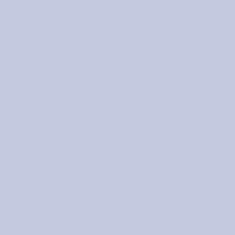

            Grey



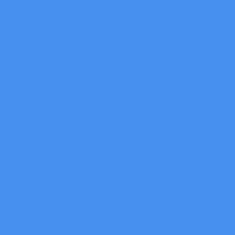

            Blue



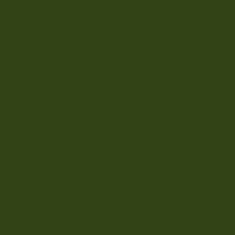

            Green



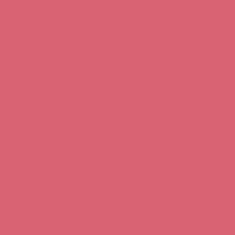

            Red



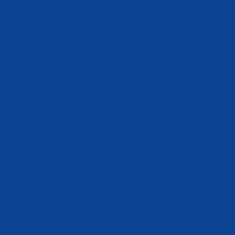

            Blue



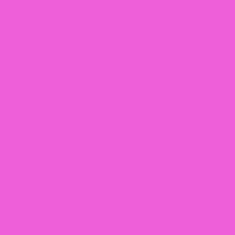

            Pink



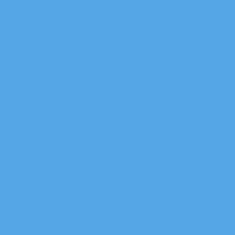

            Blue



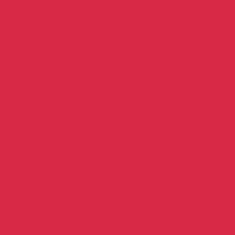

            Red



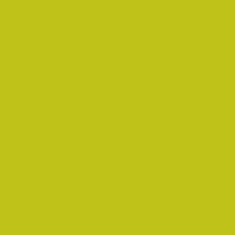

            Yellow



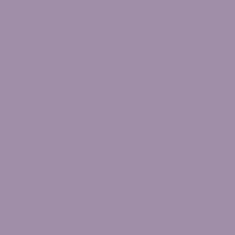

            Grey



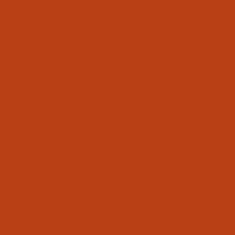

            Red



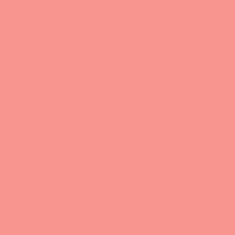

            Orange



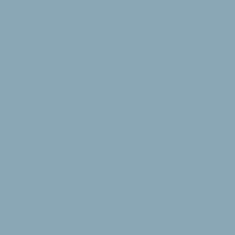

            Grey



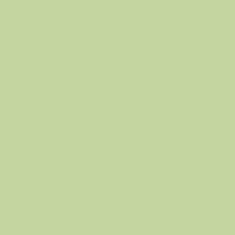

            Green



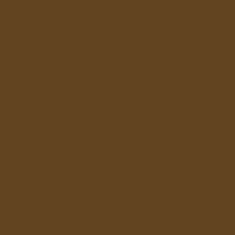

            Brown



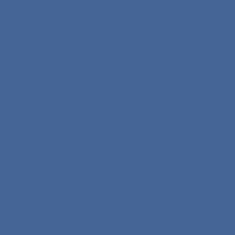

            Blue



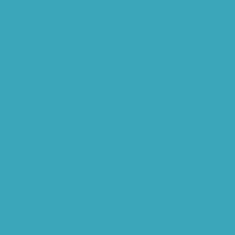

            Blue



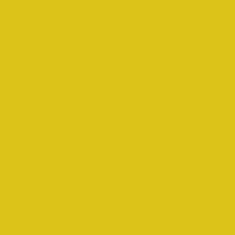

            Yellow



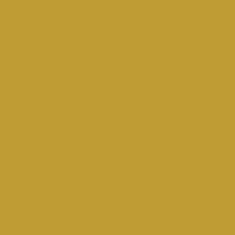

            Yellow



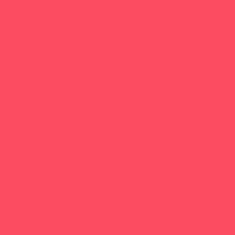

            Red



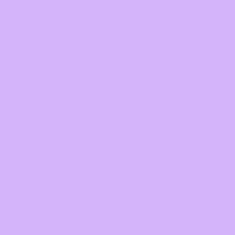

            Purple



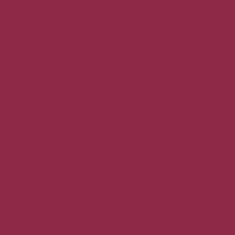

            Brown



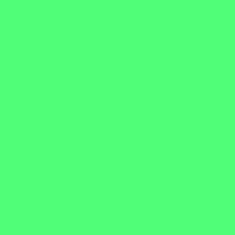

            Green



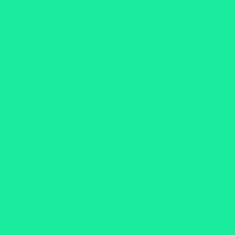

            Green



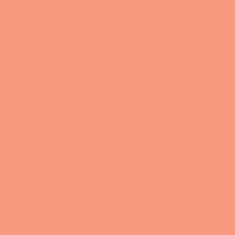

            Orange



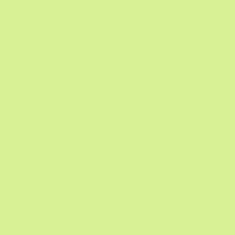

            Yellow



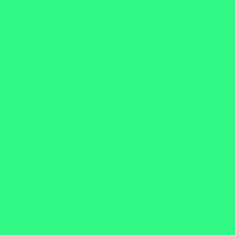

            Green



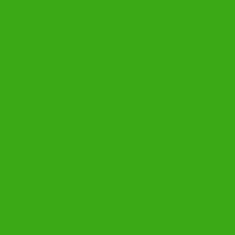

            Green



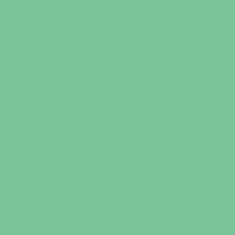

            Green



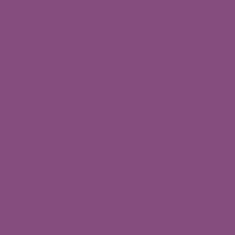

            Purple



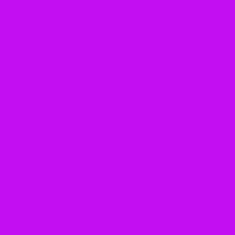

            Pink



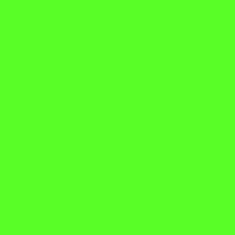

            Green



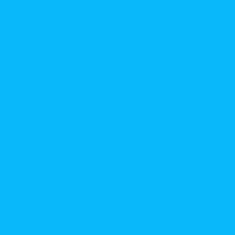

            Blue



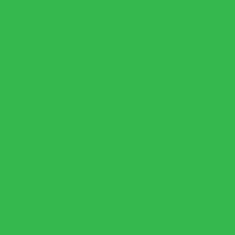

            Green



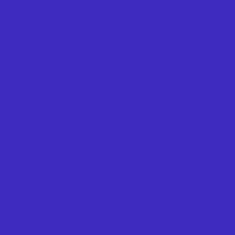

            Blue



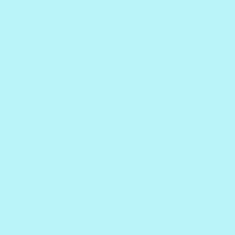

            Blue



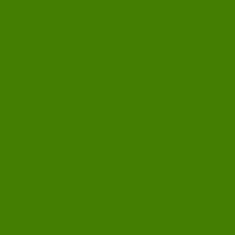

            Green



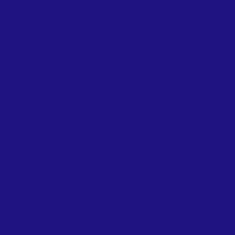

            Blue



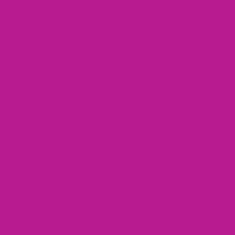

            Pink



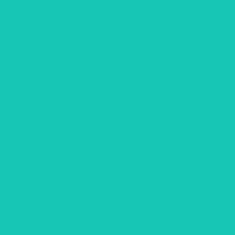

            Green



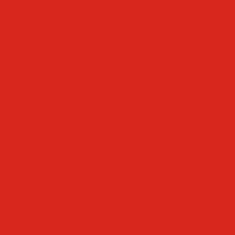

            Red



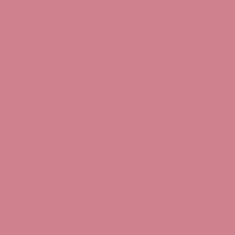

            Brown



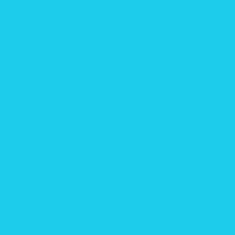

            Blue



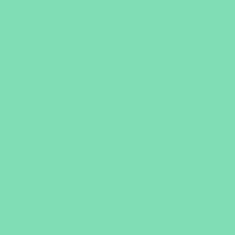

            Green



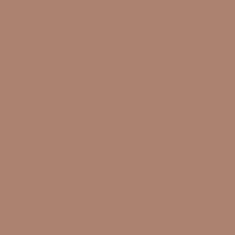

            Brown



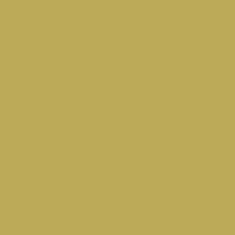

            Yellow



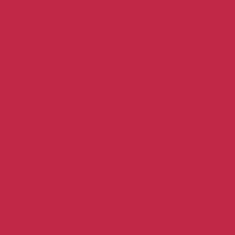

            Red



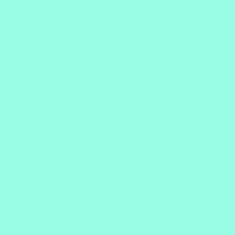

            Green



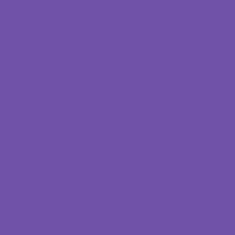

            Purple



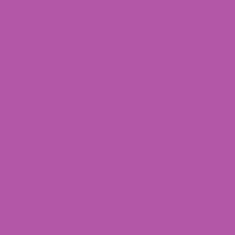

            Purple



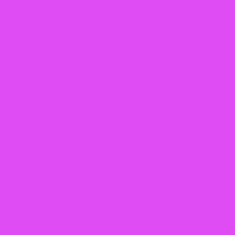

            Pink



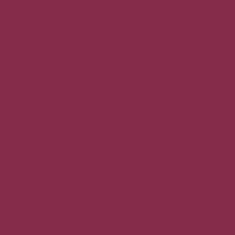

            Brown



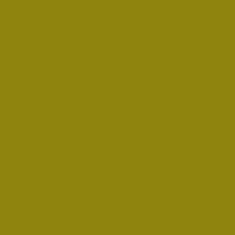

            Green



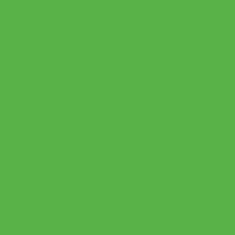

            Green



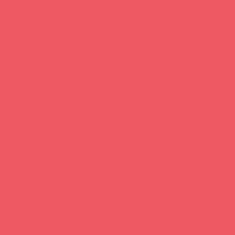

            Red



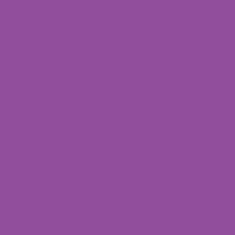

            Purple



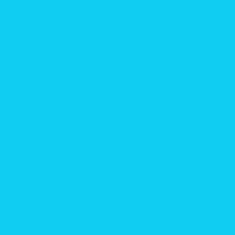

            Blue



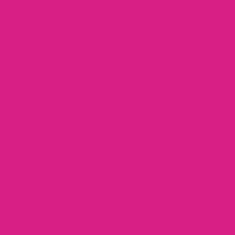

            Pink



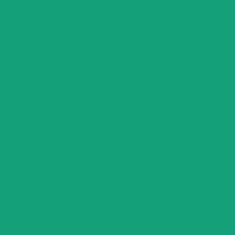

            Green



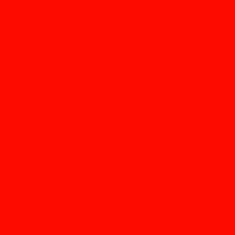

            Red



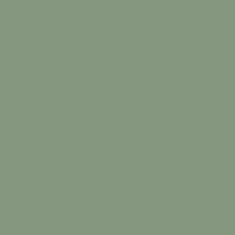

            Grey



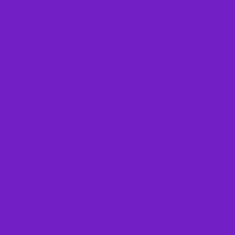

            Purple



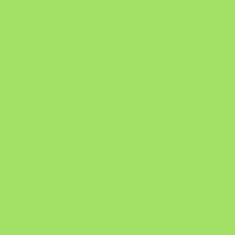

            Green



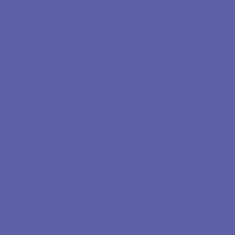

            Blue



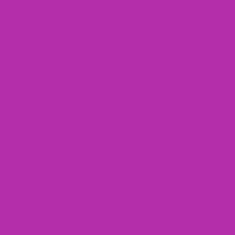

            Pink



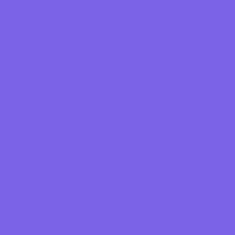

            Purple



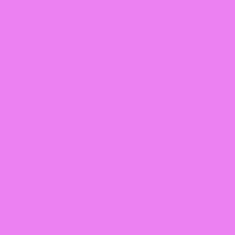

            Pink



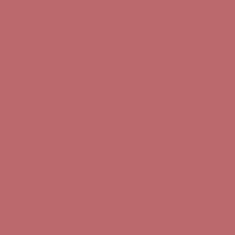

            Brown



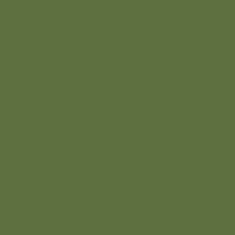

            Green



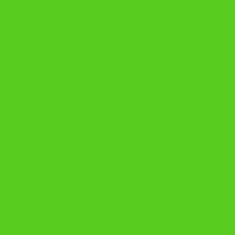

            Green



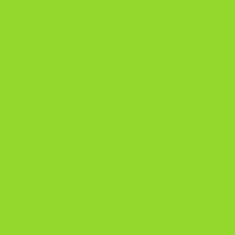

            Green



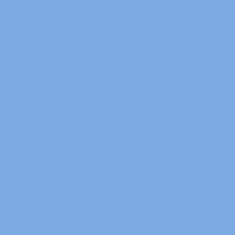

            Blue



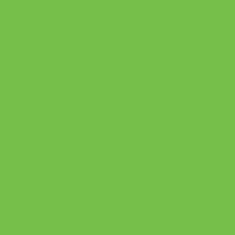

            Green



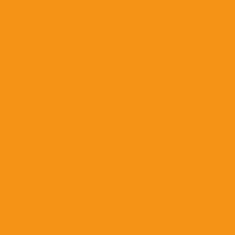

            Orange



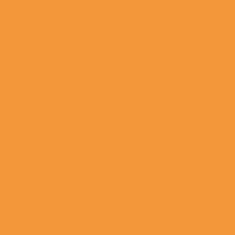

            Orange



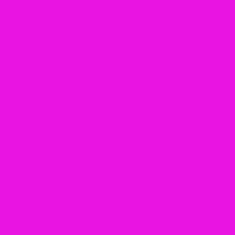

            Pink



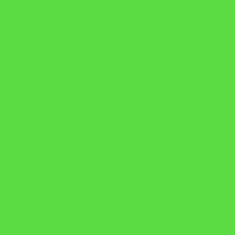

            Green



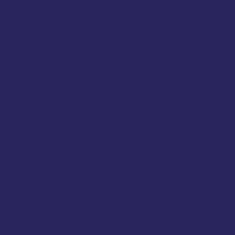

            Blue



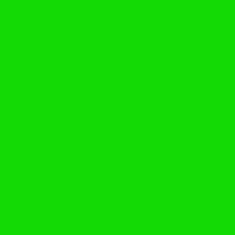

            Green



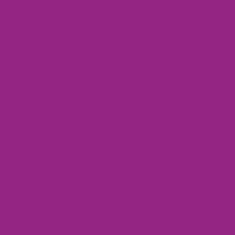

            Purple



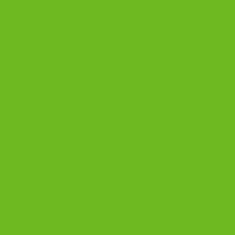

            Green



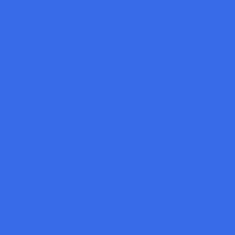

            Blue



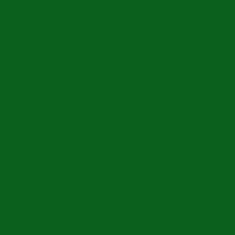

            Green



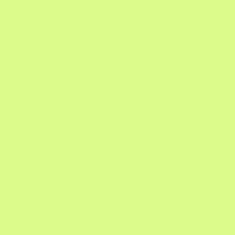

            Yellow



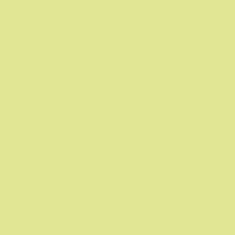

            Yellow



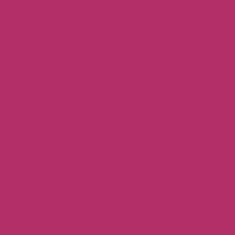

            Pink



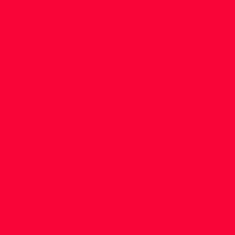

            Red



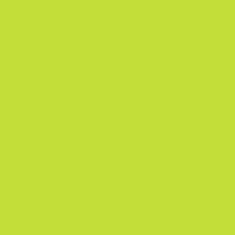

            Green



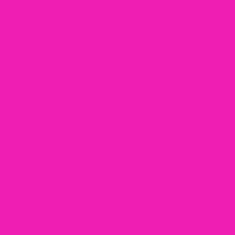

            Pink



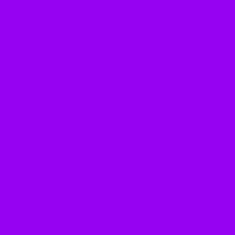

            Purple



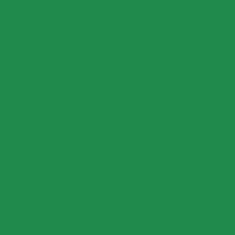

            Green



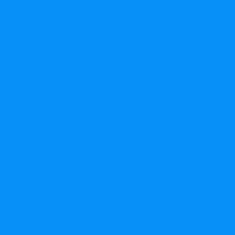

            Blue



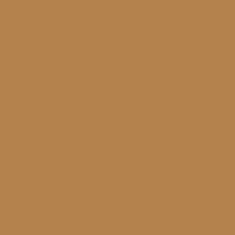

            Brown



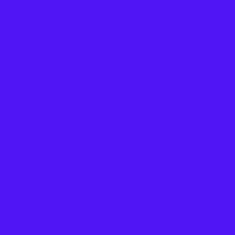

            Blue



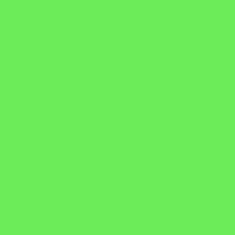

            Green



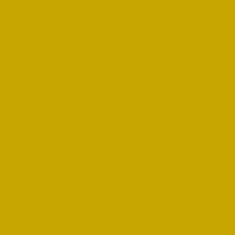

            Yellow



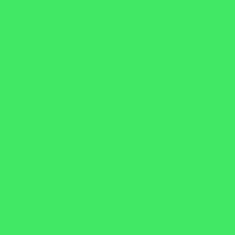

            Green



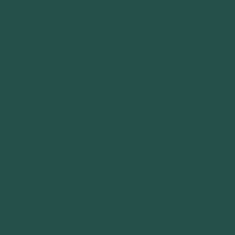

            Green



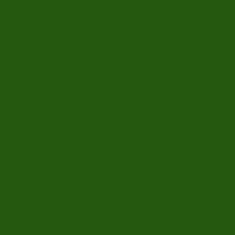

            Green



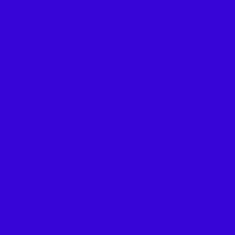

            Blue



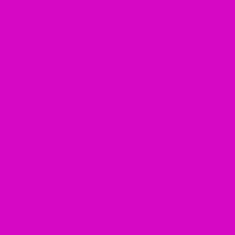

            Pink



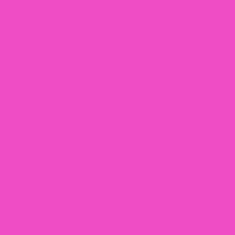

            Pink



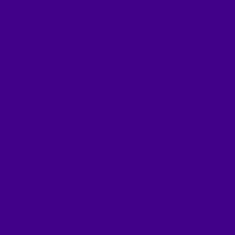

            Blue



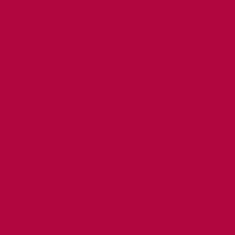

            Red



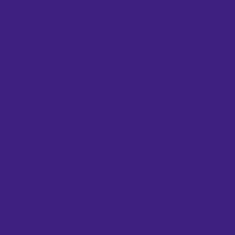

            Blue



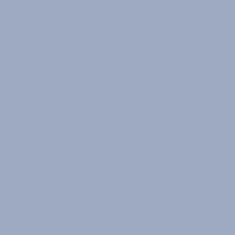

            Grey



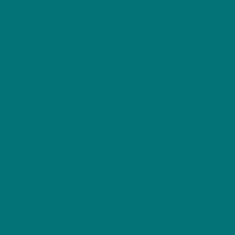

            Blue



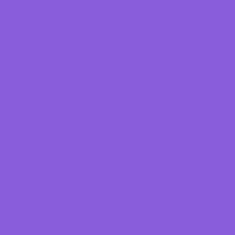

            Purple



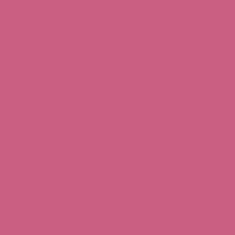

            Pink



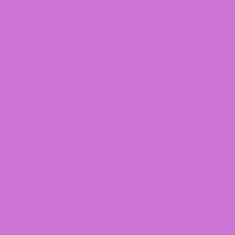

            Pink



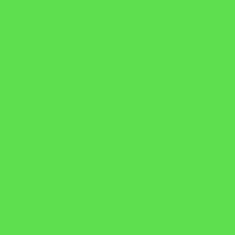

            Green



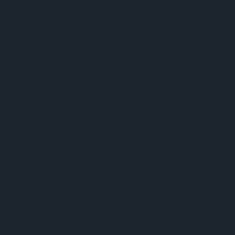

            Black



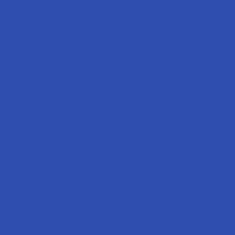

            Blue



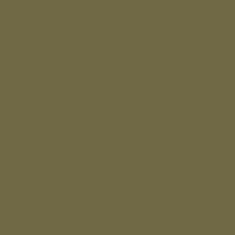

            Brown



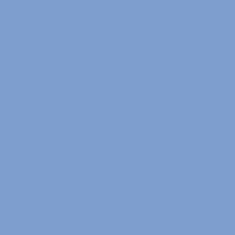

            Blue



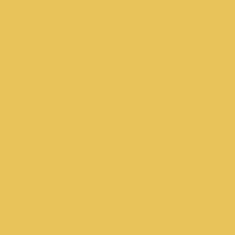

            Yellow



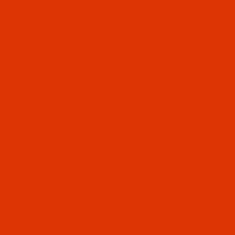

            Red



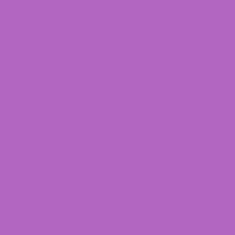

            Purple



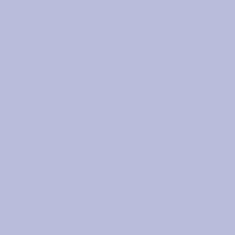

            Grey



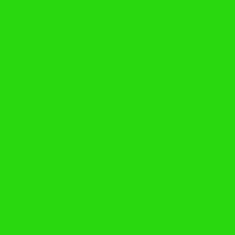

            Green



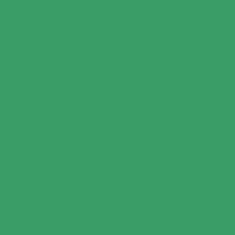

            Green



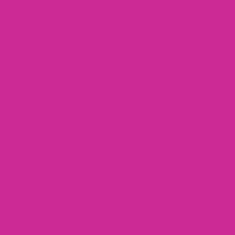

            Pink



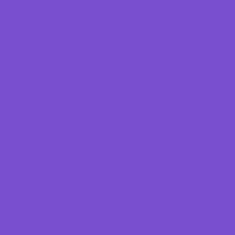

            Purple



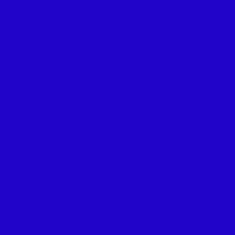

            Blue



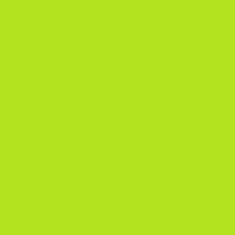

            Green



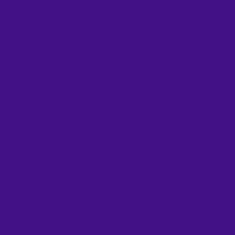

            Blue



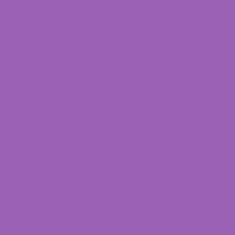

            Purple



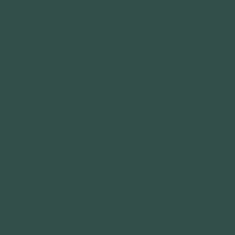

            Grey



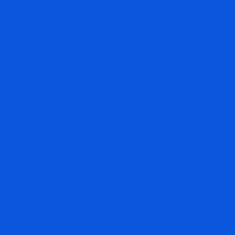

            Blue



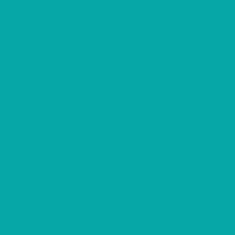

            Blue



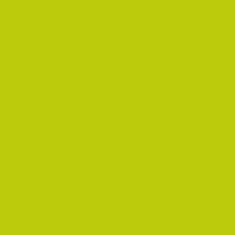

            Yellow



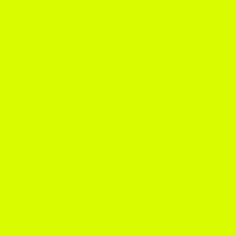

            Yellow



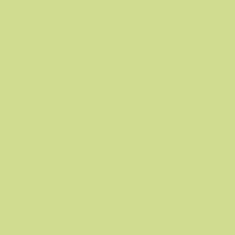

            Yellow



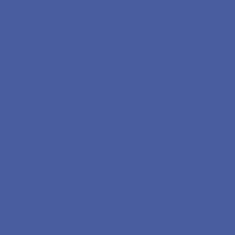

            Blue



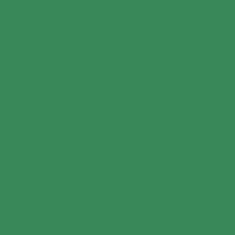

            Green



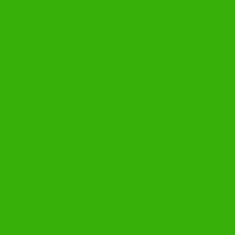

            Green



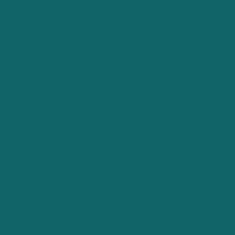

            Green



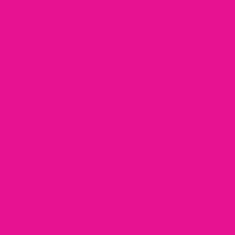

            Pink



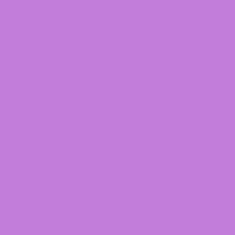

            Pink



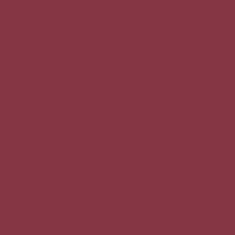

            Brown



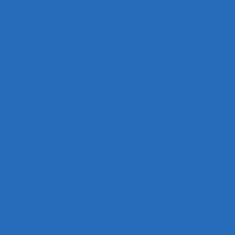

            Blue



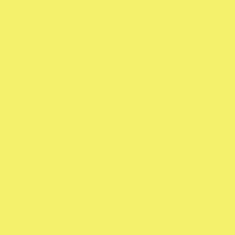

            Yellow



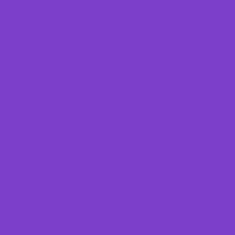

            Purple



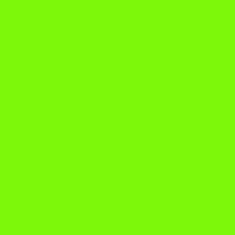

            Green



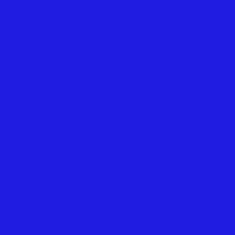

            Blue



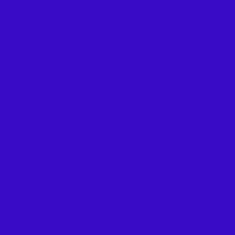

            Blue



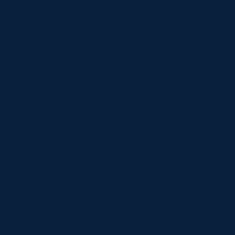

            Blue



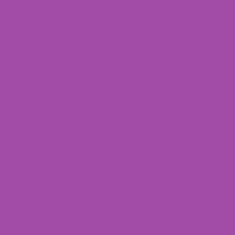

            Purple



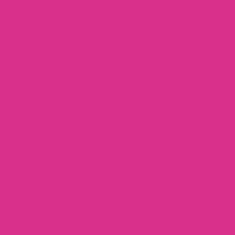

            Pink



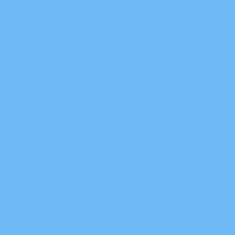

            Blue



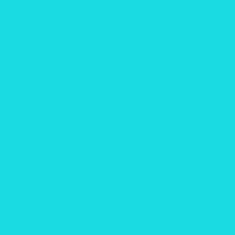

            Blue



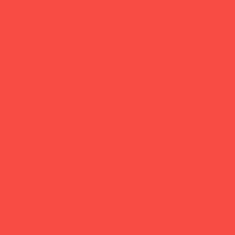

            Red



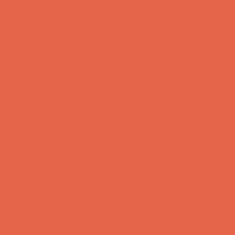

            Orange



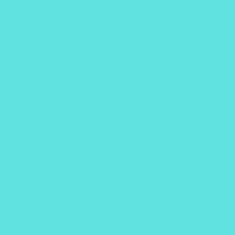

            Blue



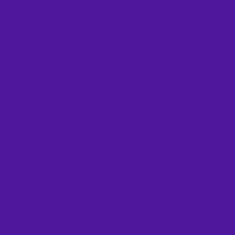

            Purple



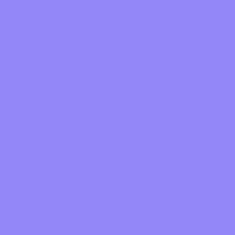

            Blue



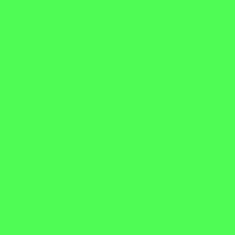

            Green



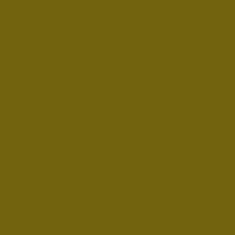

            Green



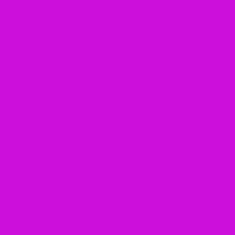

            Pink



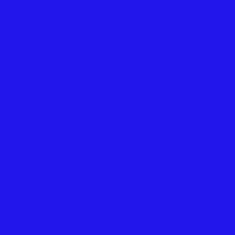

            Blue



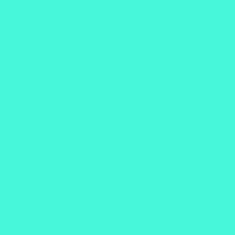

            Green



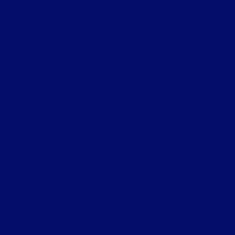

            Blue



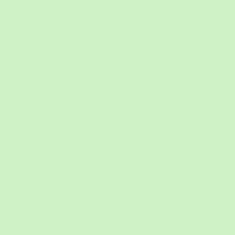

            Green



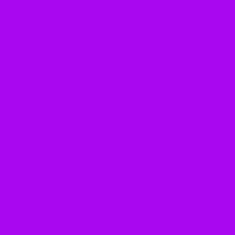

            Purple



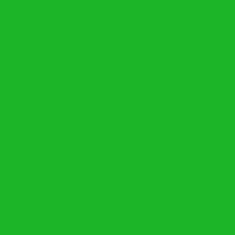

            Green



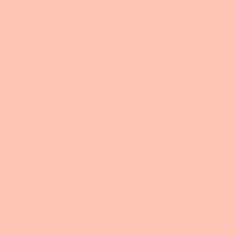

            Orange



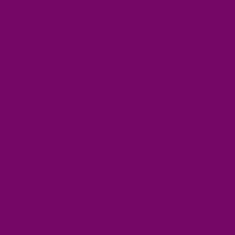

            Purple



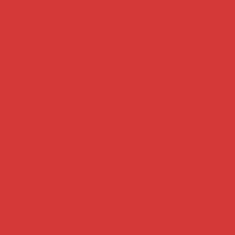

            Red



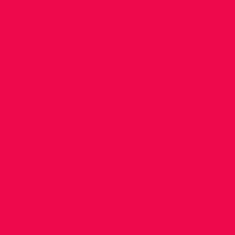

            Red



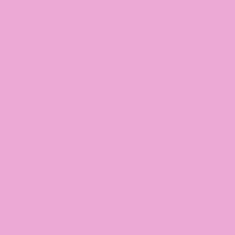

            Pink



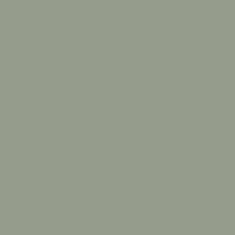

            Grey



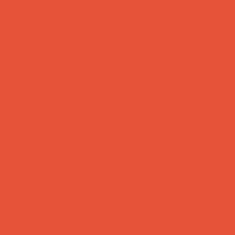

            Red



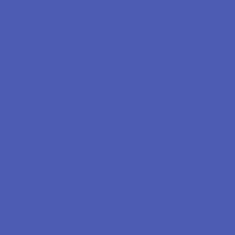

            Blue



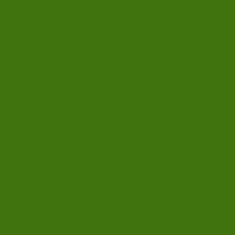

            Green



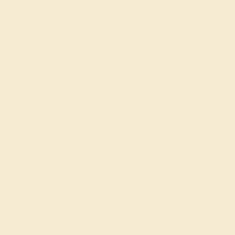

            White



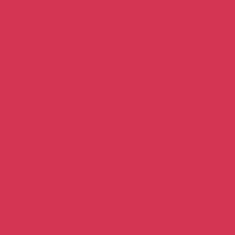

            Red



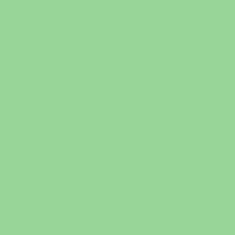

            Green



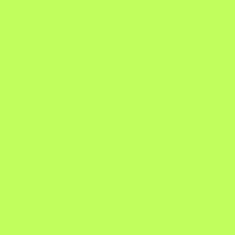

            Green



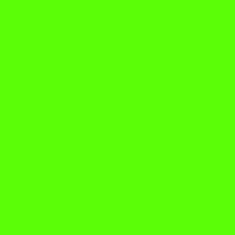

            Green



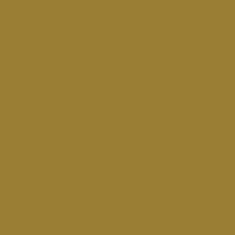

            Brown



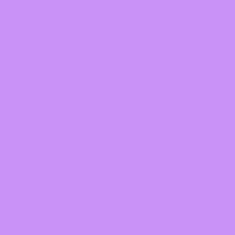

            Pink



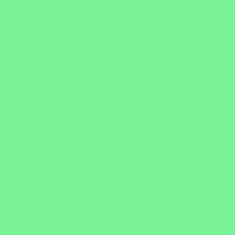

            Green



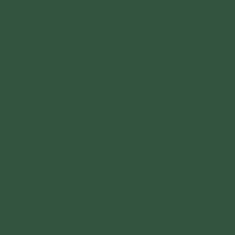

            Green



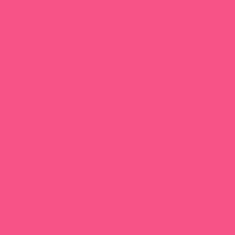

            Pink



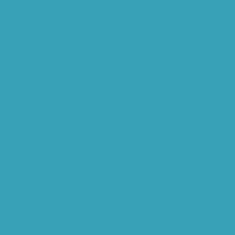

            Blue



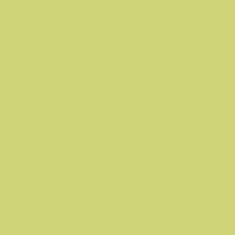

            Yellow



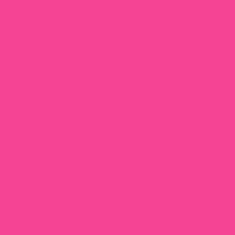

            Pink



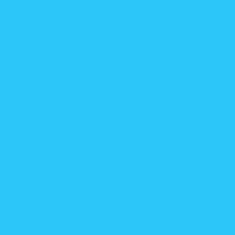

            Blue



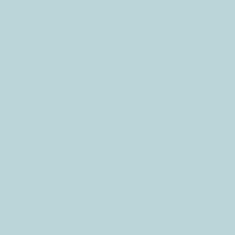

            Grey



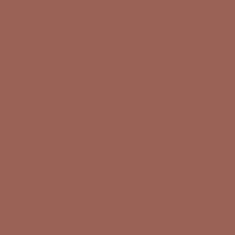

            Brown



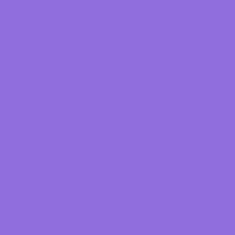

            Purple



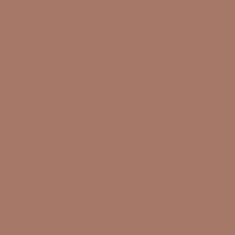

            Brown



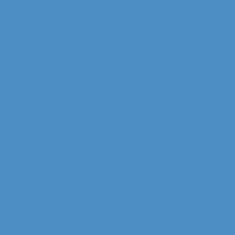

            Blue



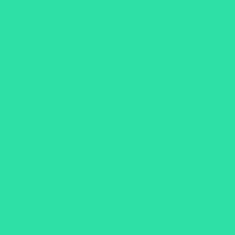

            Green



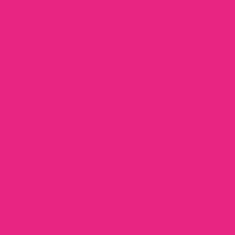

            Pink



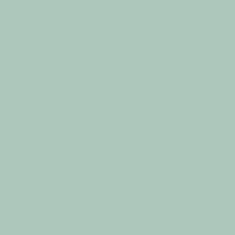

            Grey



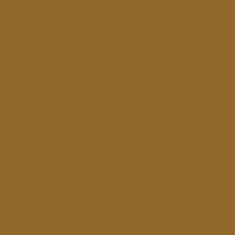

            Brown



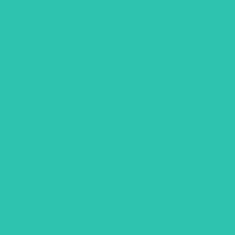

            Green



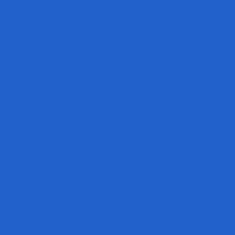

            Blue



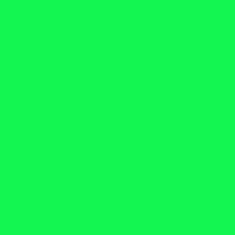

            Green



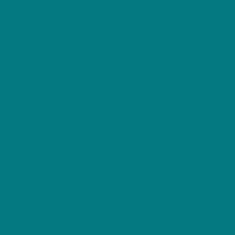

            Blue



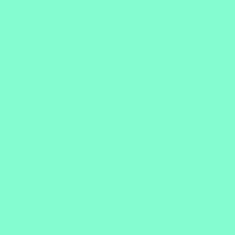

            Green



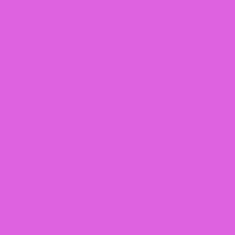

            Pink



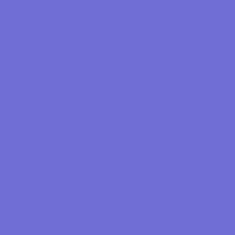

            Blue



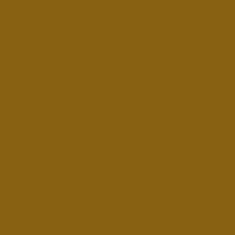

            Brown



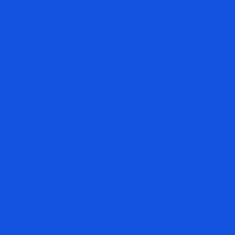

            Blue



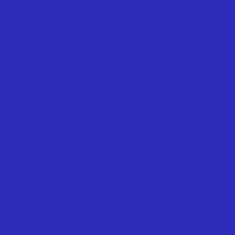

            Blue



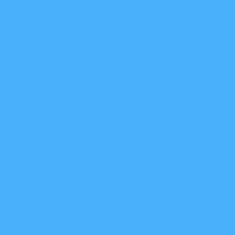

            Blue



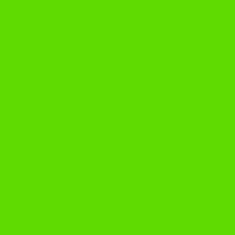

            Green



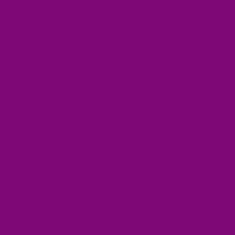

            Purple



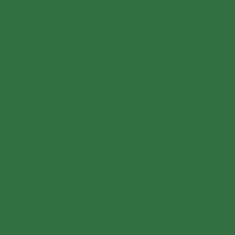

            Green



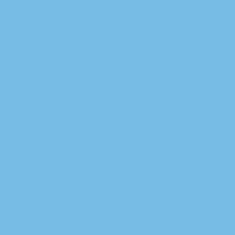

            Blue



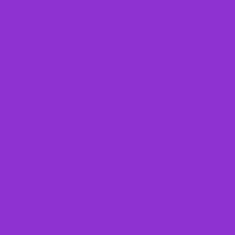

            Purple



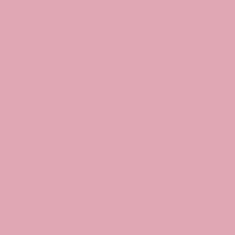

            Pink



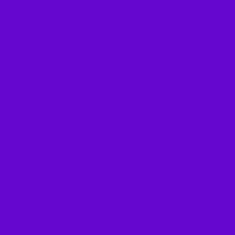

            Purple



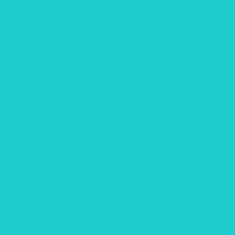

            Blue



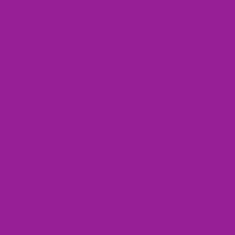

            Purple



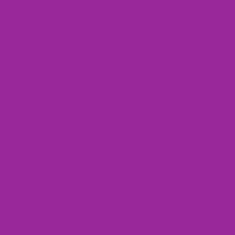

            Purple



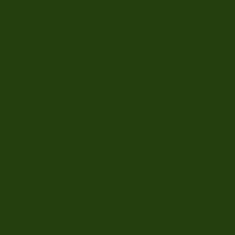

            Green



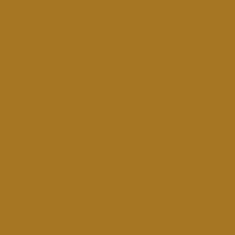

            Brown



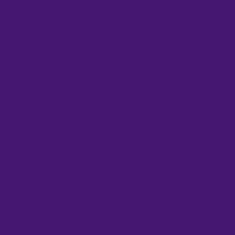

            Purple



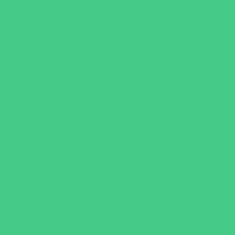

            Green



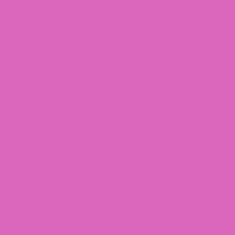

            Pink



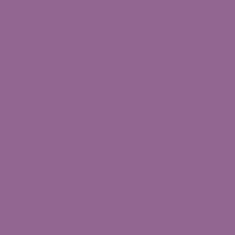

            Purple



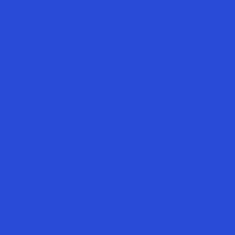

            Blue



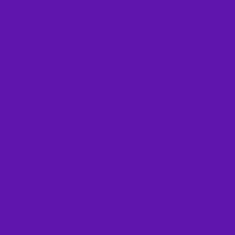

            Purple



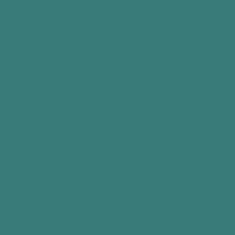

            Green



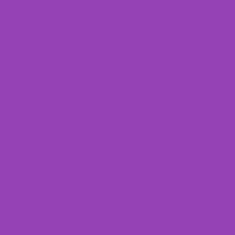

            Purple



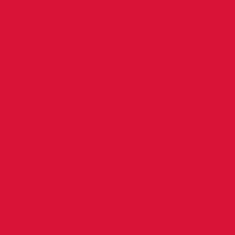

            Red



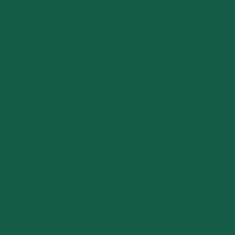

            Green



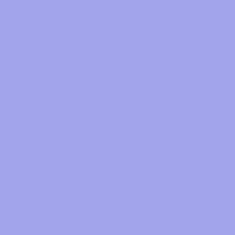

            Blue



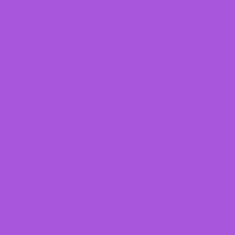

            Purple



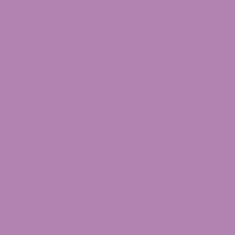

            Purple



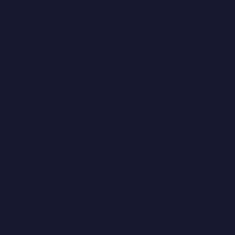

            Black



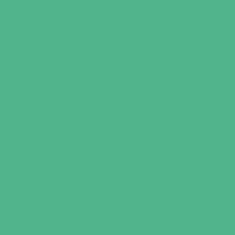

            Green



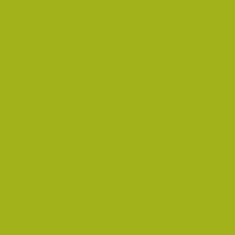

            Green



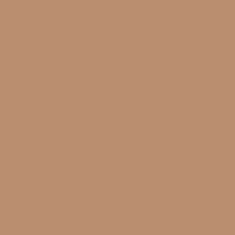

            Brown



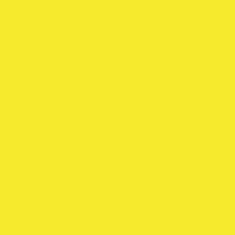

            Yellow



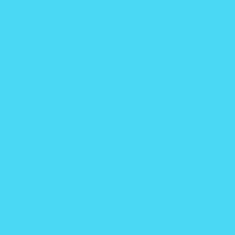

            Blue



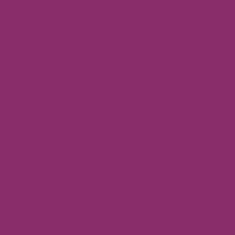

            Purple



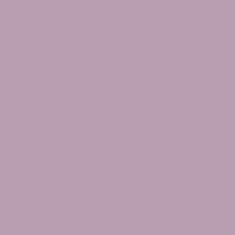

            Grey



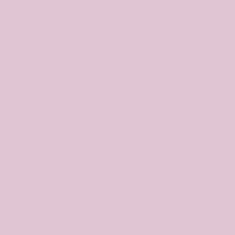

            Grey



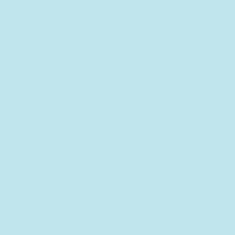

            Blue



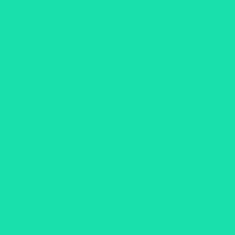

            Green



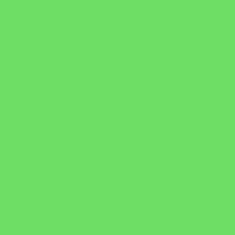

            Green



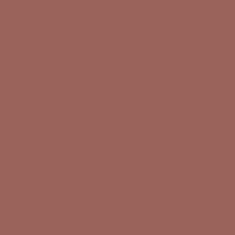

            Brown



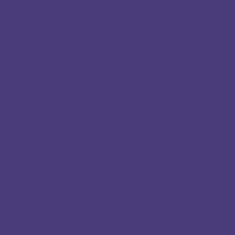

            Purple



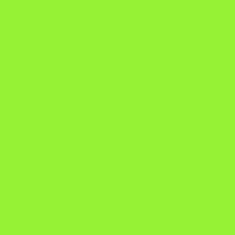

            Green



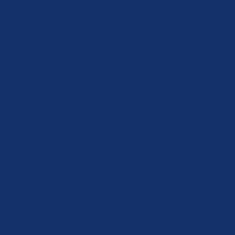

            Blue



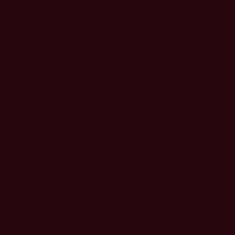

            Brown



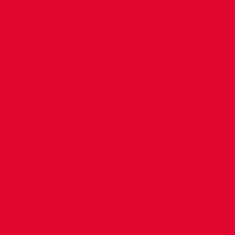

            Red



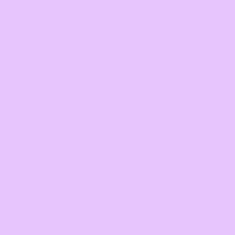

            Pink



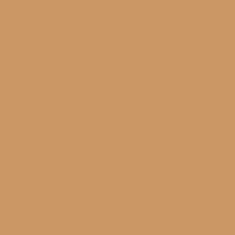

            Brown



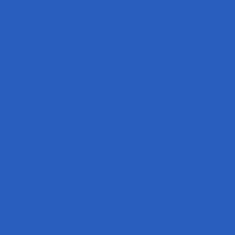

            Blue



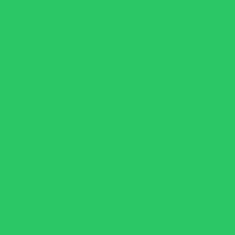

            Green



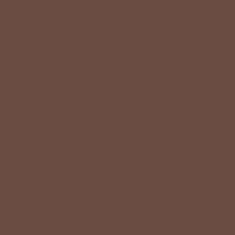

            Brown



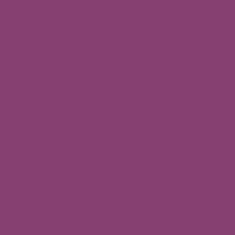

            Purple



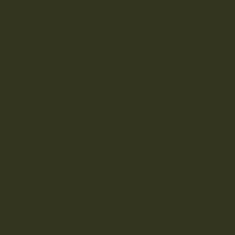

            Grey



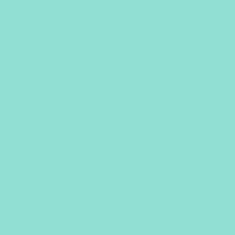

            Green



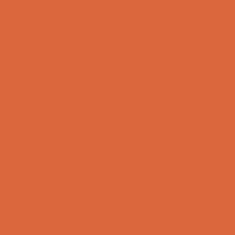

            Orange



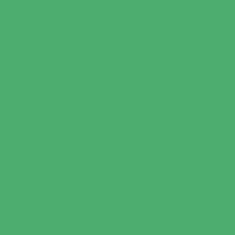

            Green



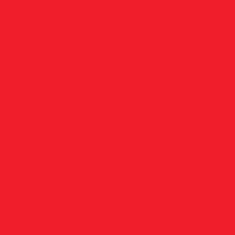

            Red



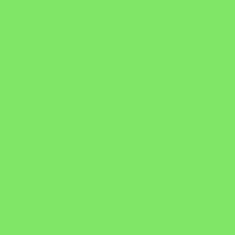

            Green



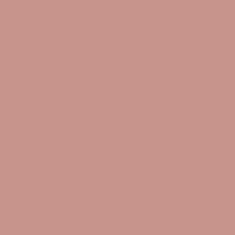

            Brown



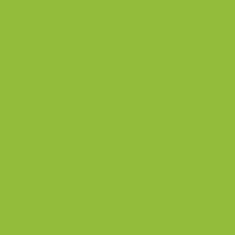

            Green



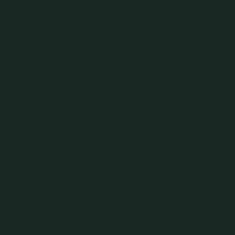

            Green



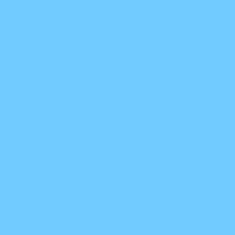

            Blue



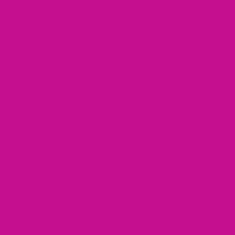

            Pink



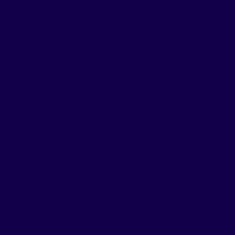

            Blue



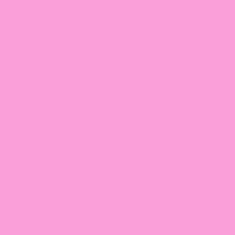

            Pink



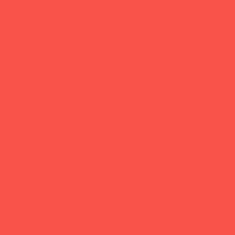

            Red



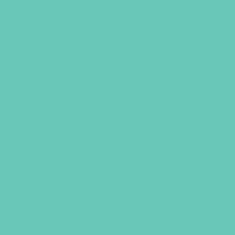

            Green



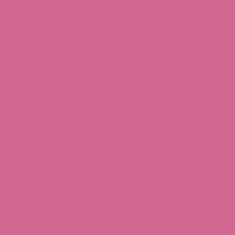

            Pink



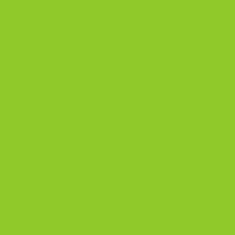

            Green



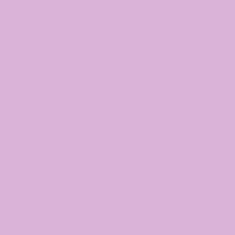

            Pink



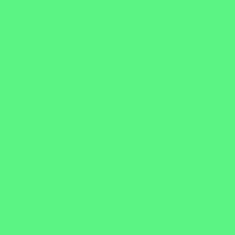

            Green



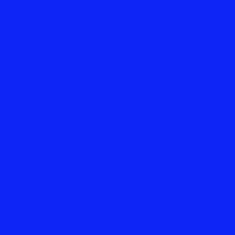

            Blue



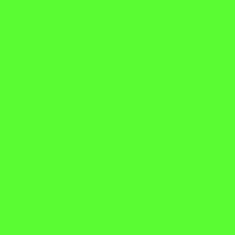

            Green



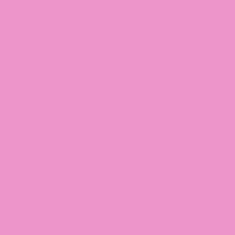

            Pink



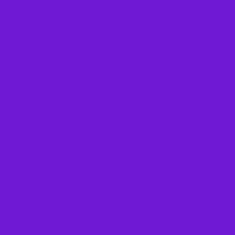

            Purple



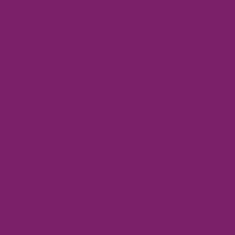

            Purple



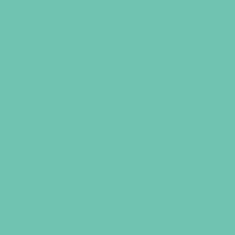

            Green



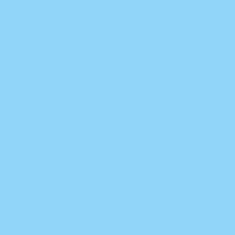

            Blue



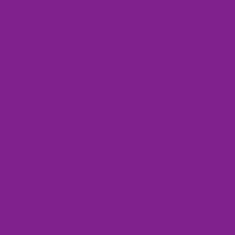

            Purple



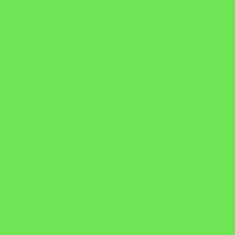

            Green



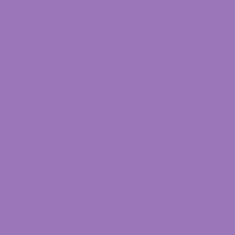

            Purple



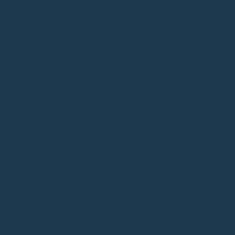

            Blue



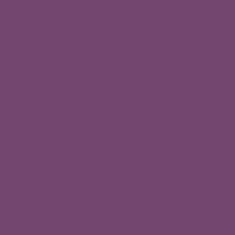

            Purple



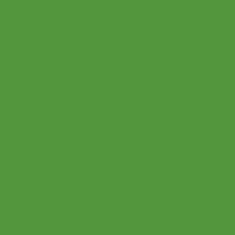

            Green



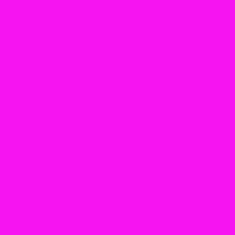

            Pink



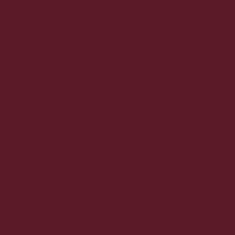

            Brown



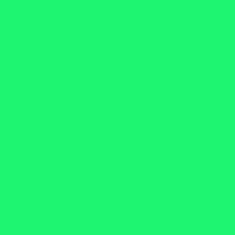

            Green



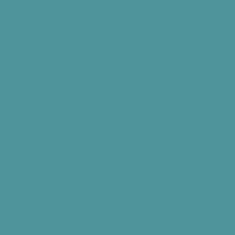

            Blue



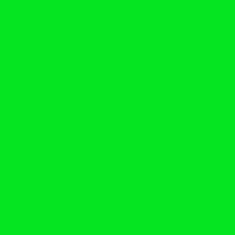

            Green



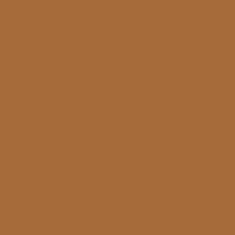

            Brown



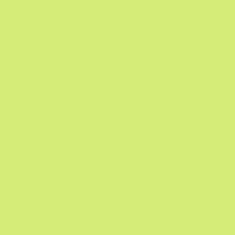

            Yellow



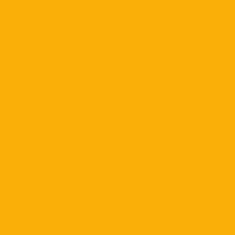

            Orange



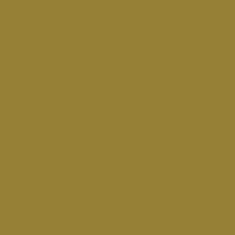

            Brown



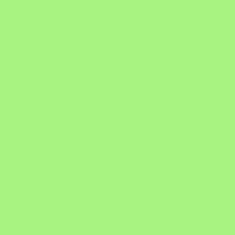

            Green



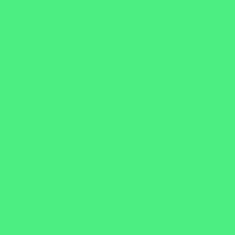

            Green



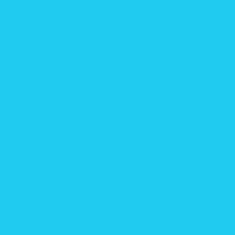

            Blue



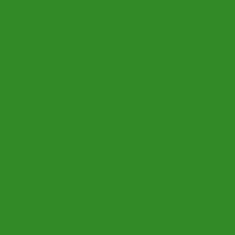

            Green



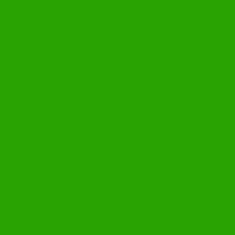

            Green



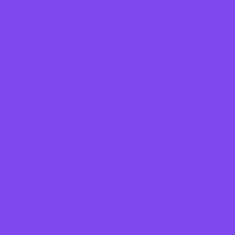

            Purple



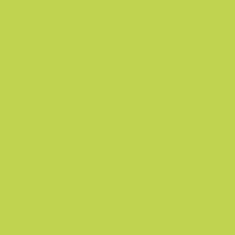

            Green



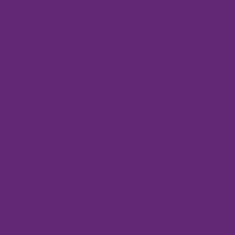

            Purple



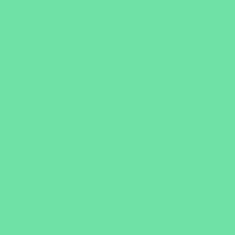

            Green



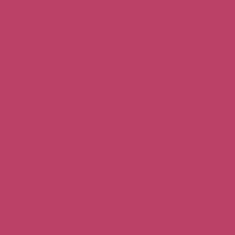

            Pink



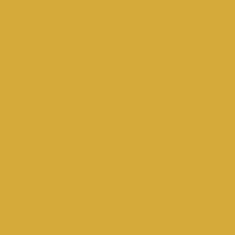

            Yellow



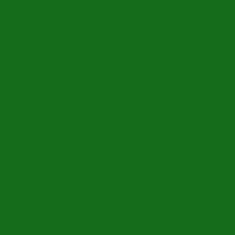

            Green



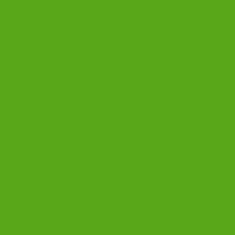

            Green



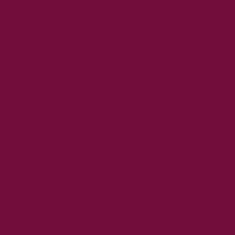

            Brown



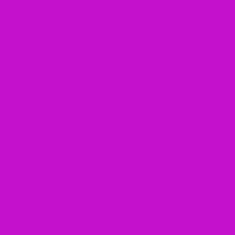

            Pink



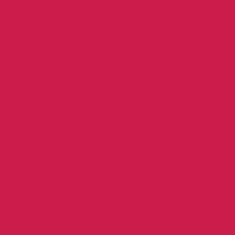

            Red



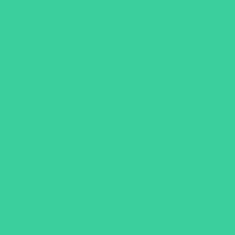

            Green



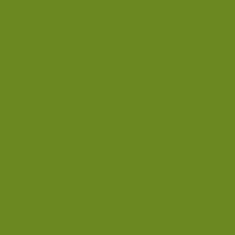

            Green



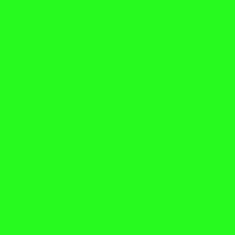

            Green



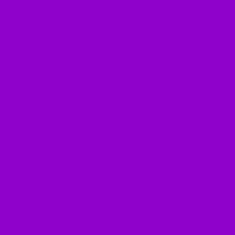

            Purple



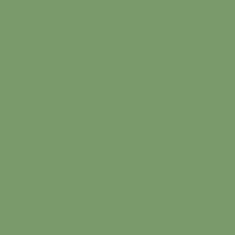

            Green



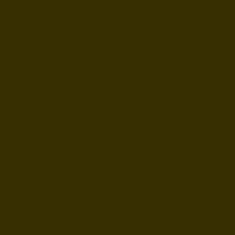

            Brown



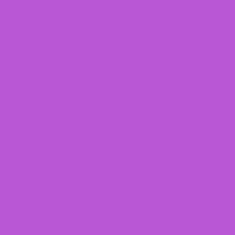

            Purple



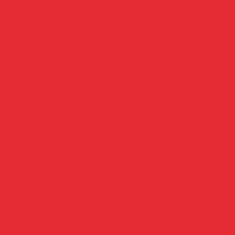

            Red



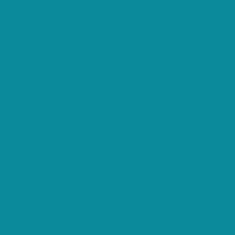

            Blue



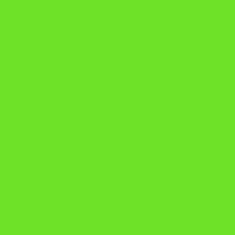

            Green



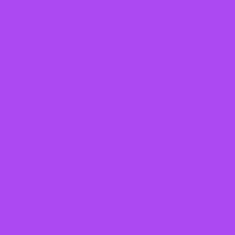

            Purple



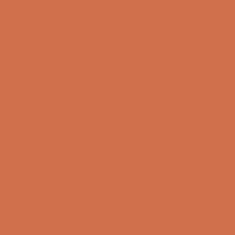

            Orange



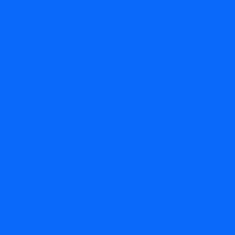

            Blue



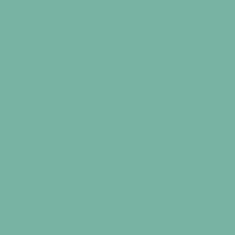

            Green



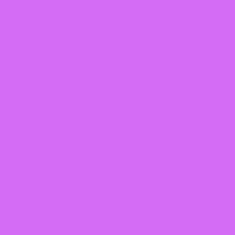

            Pink



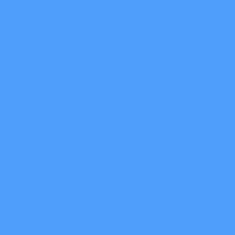

            Blue



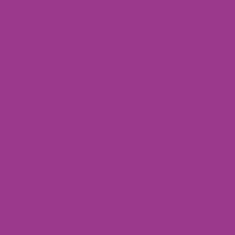

            Purple



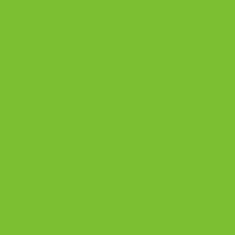

            Green



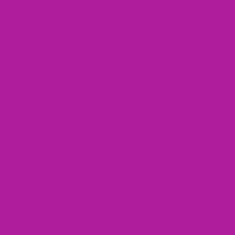

            Purple



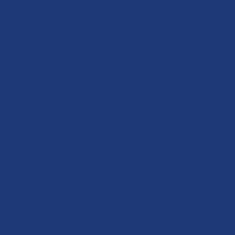

            Blue



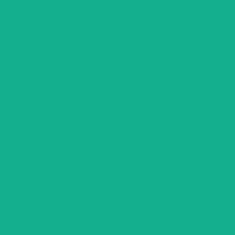

            Green



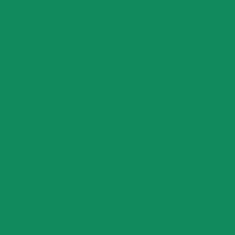

            Green



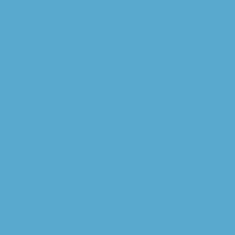

            Blue



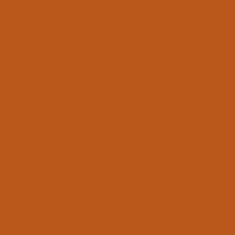

            Brown



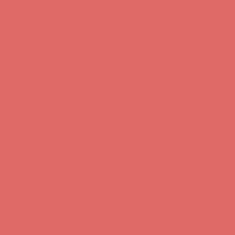

            Red



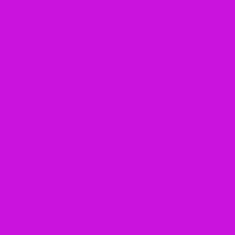

            Pink



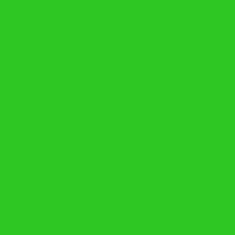

            Green



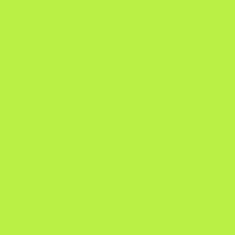

            Green



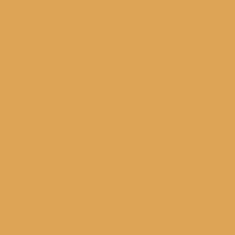

            Orange



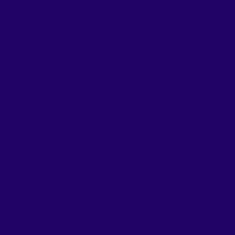

            Blue



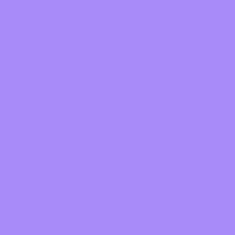

            Blue



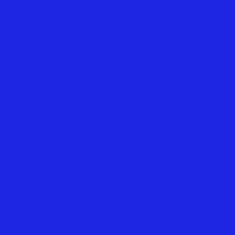

            Blue



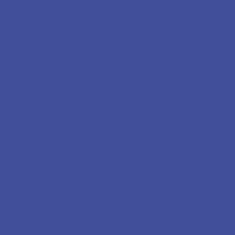

            Blue



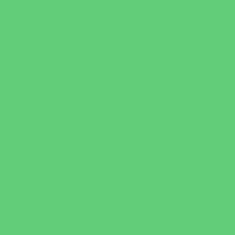

            Green



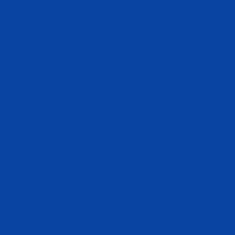

            Blue



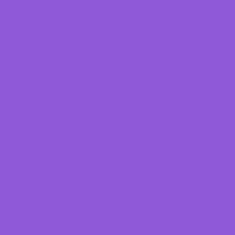

            Purple



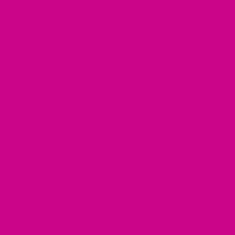

            Pink



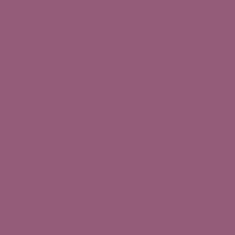

            Purple



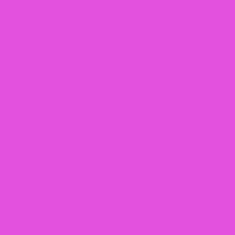

            Pink



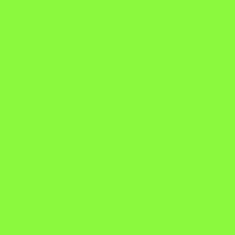

            Green



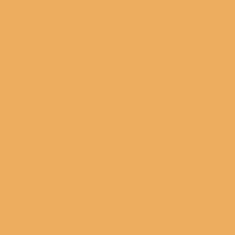

            Orange



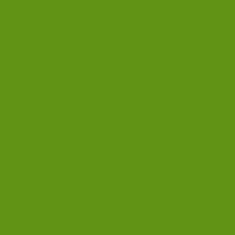

            Green



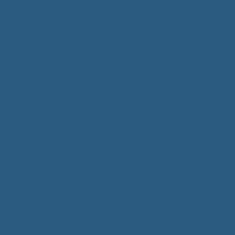

            Blue



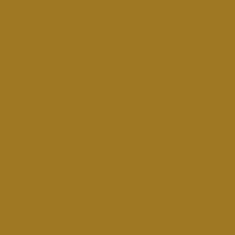

            Brown



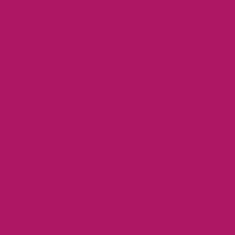

            Pink



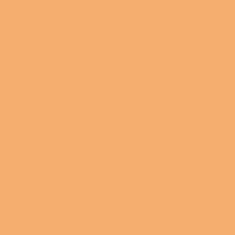

            Orange



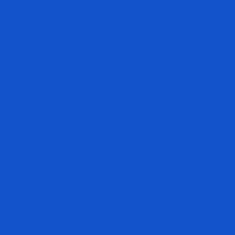

            Blue



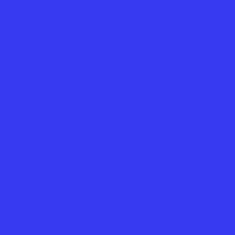

            Blue



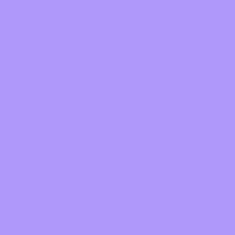

            Blue



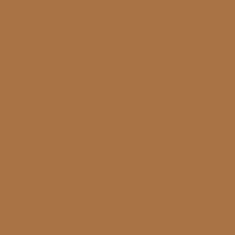

            Brown



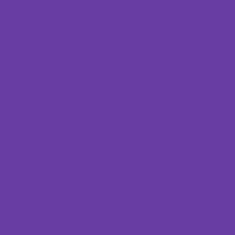

            Purple



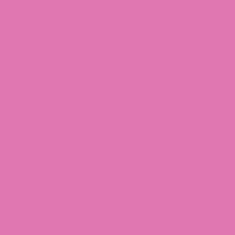

            Pink



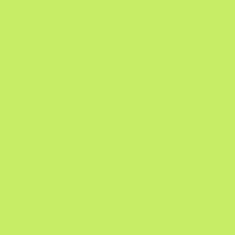

            Yellow



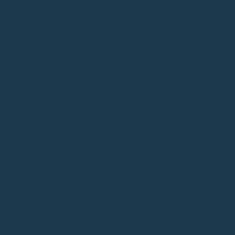

            Blue



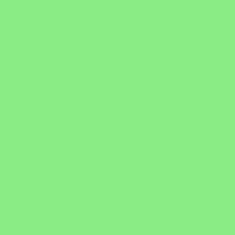

            Green



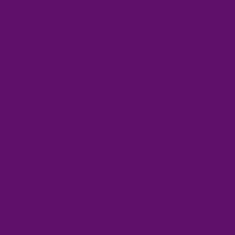

            Purple



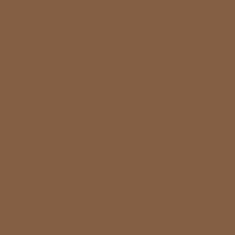

            Brown



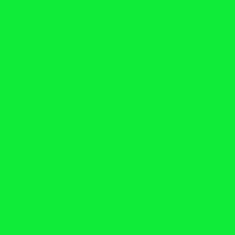

            Green



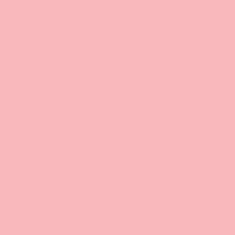

            Orange



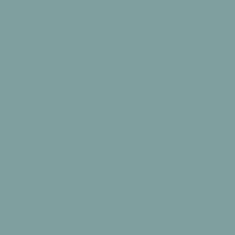

            Grey



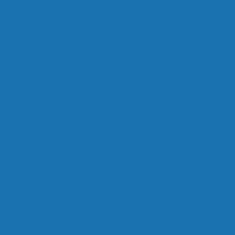

            Blue



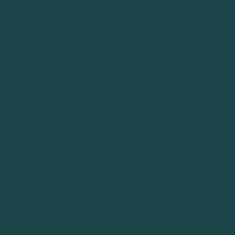

            Green



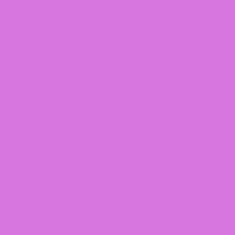

            Pink



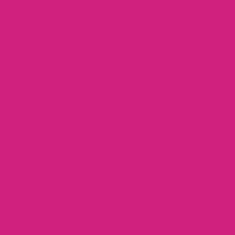

            Pink



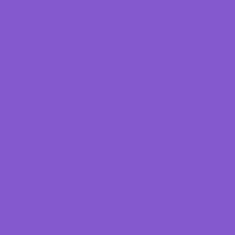

            Purple



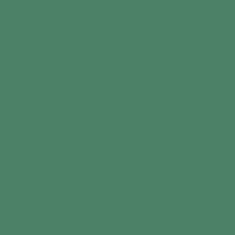

            Green



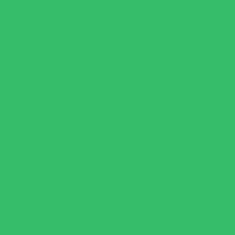

            Green



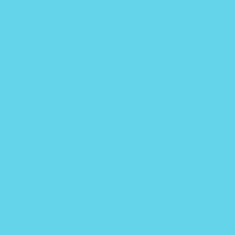

            Blue



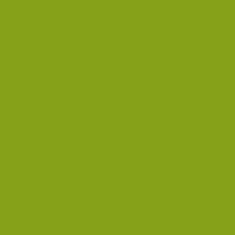

            Green



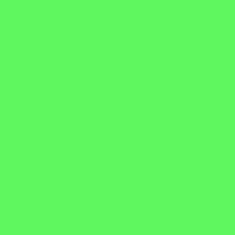

            Green



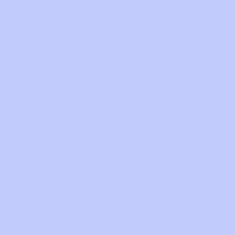

            Blue



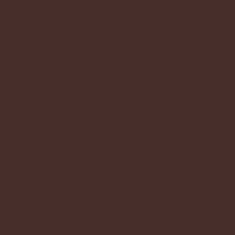

            Brown



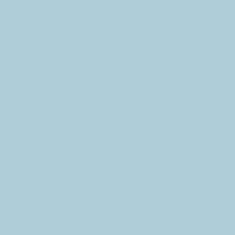

            Grey



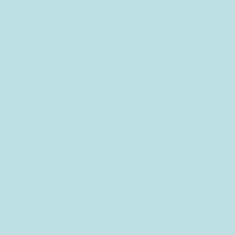

            Grey



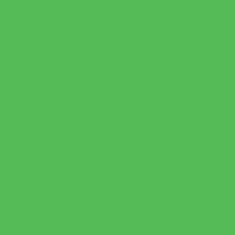

            Green



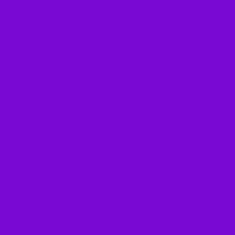

            Purple



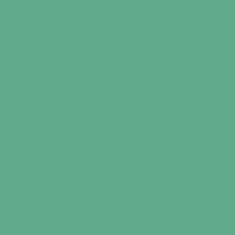

            Green



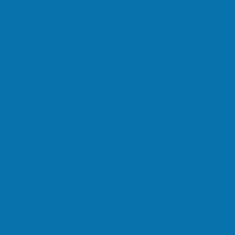

            Blue



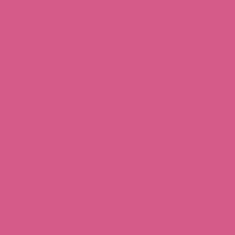

            Pink



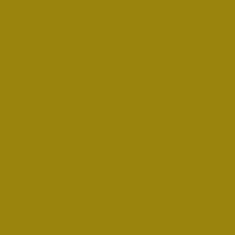

            Green



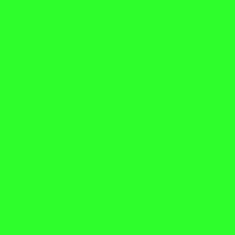

            Green



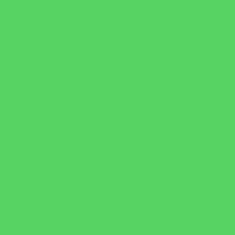

            Green



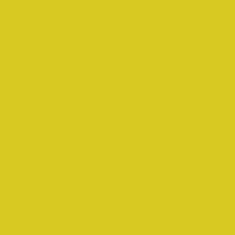

            Yellow



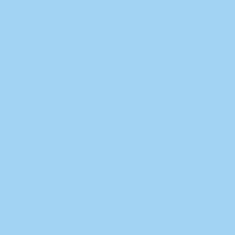

            Blue



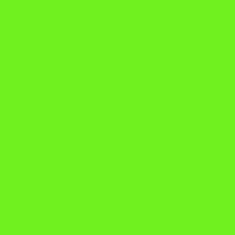

            Green



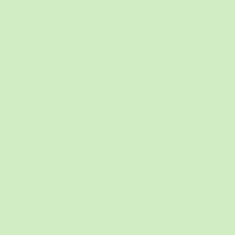

            Yellow



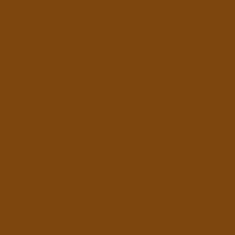

            Brown



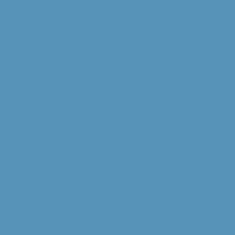

            Blue



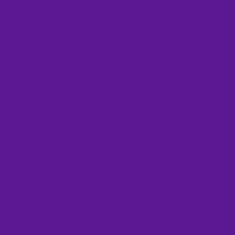

            Purple



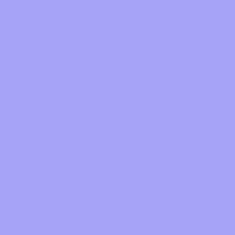

            Blue



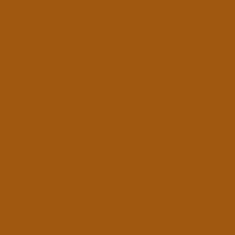

            Brown



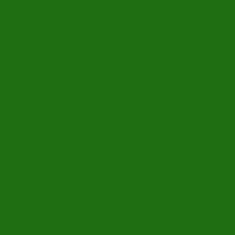

            Green



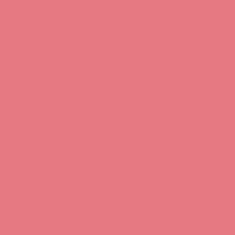

            Red



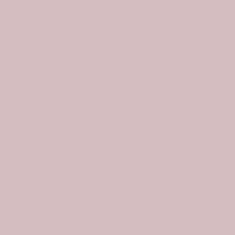

            Grey



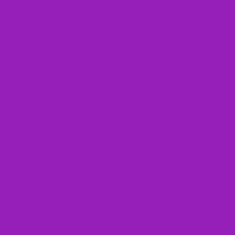

            Purple



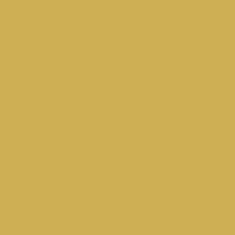

            Yellow



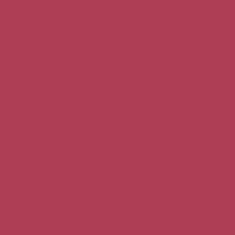

            Red



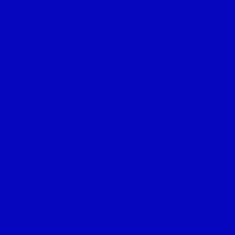

            Blue



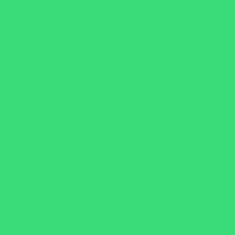

            Green



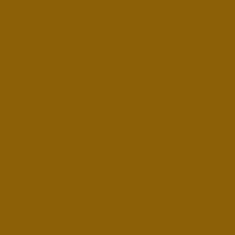

            Brown



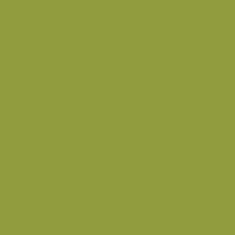

            Green



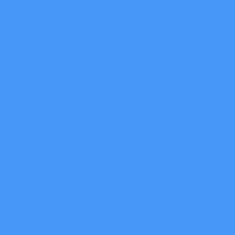

            Blue



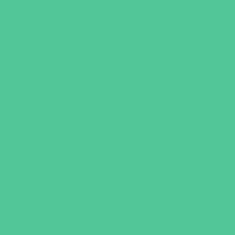

            Green



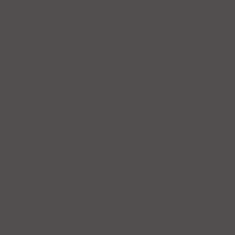

            Grey



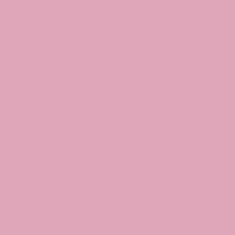

            Pink



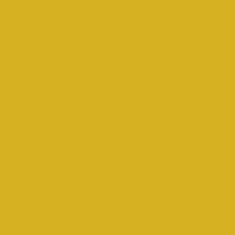

            Yellow



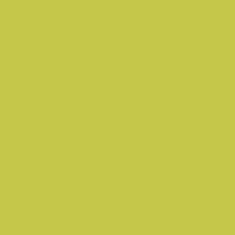

            Yellow



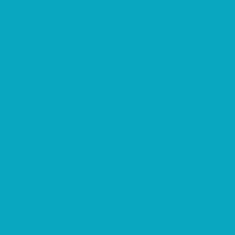

            Blue



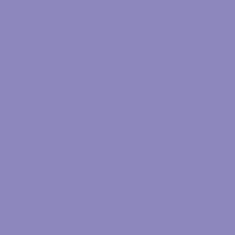

            Purple



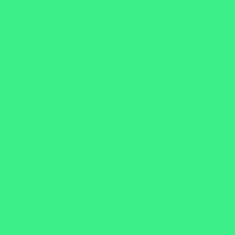

            Green



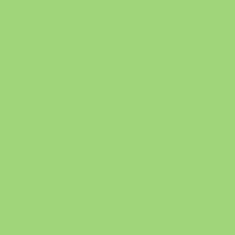

            Green



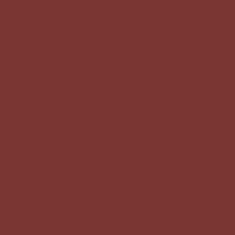

            Brown



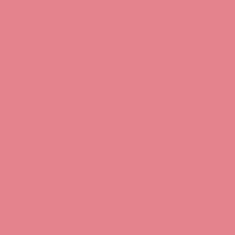

            Red



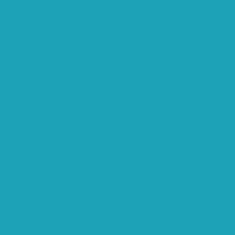

            Blue



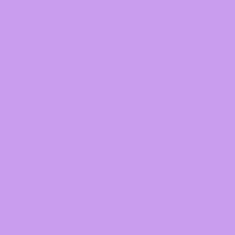

            Purple



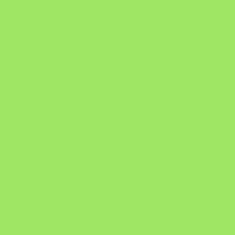

            Green



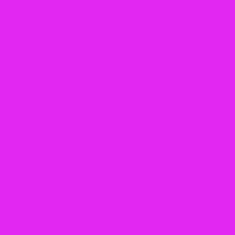

            Pink



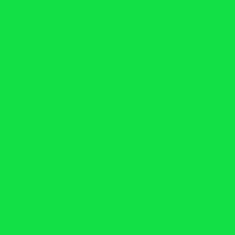

            Green



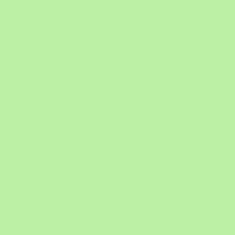

            Green



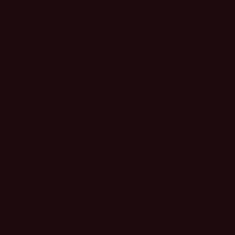

            Brown



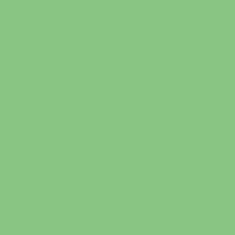

            Green



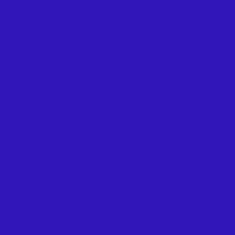

            Blue



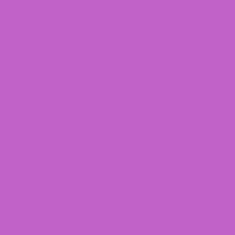

            Pink



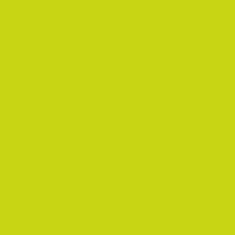

            Yellow



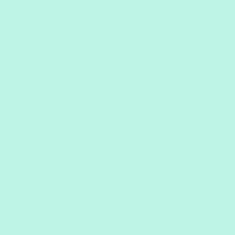

            Green



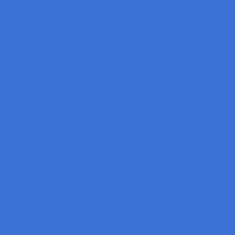

            Blue



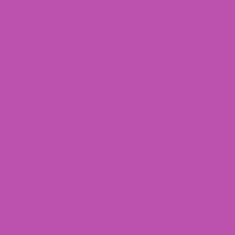

            Pink



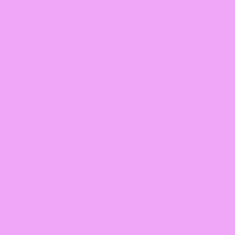

            Pink



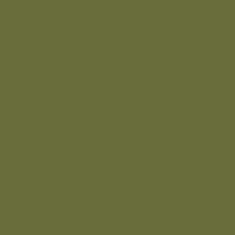

            Green



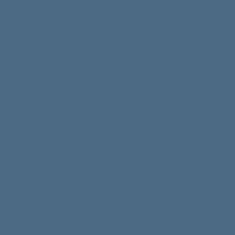

            Blue



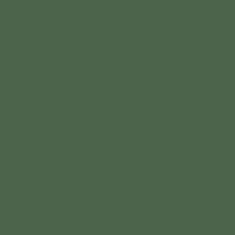

            Grey



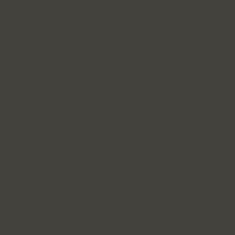

            Grey



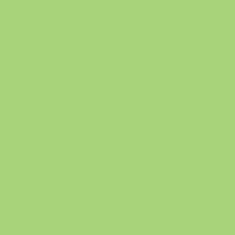

            Green



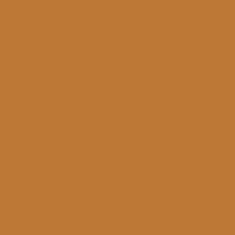

            Brown



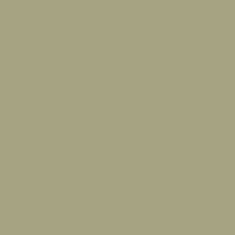

            Grey



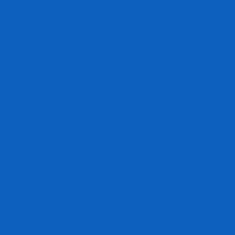

            Blue



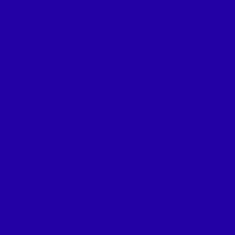

            Blue



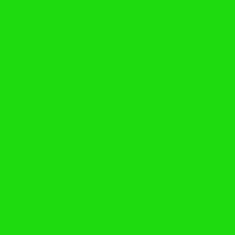

            Green



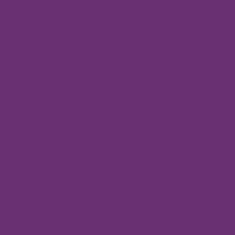

            Purple



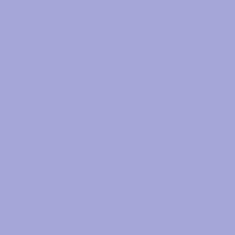

            Purple



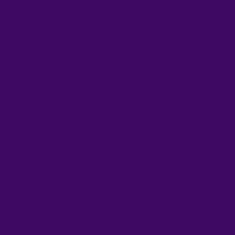

            Purple



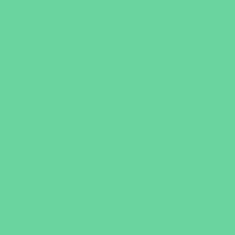

            Green



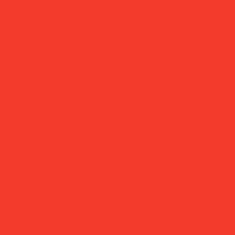

            Red



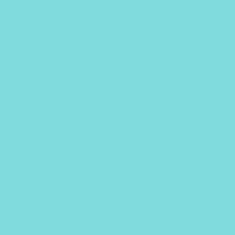

            Blue



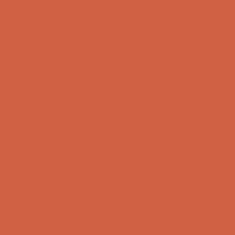

            Orange



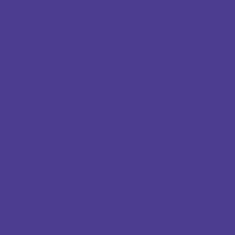

            Purple



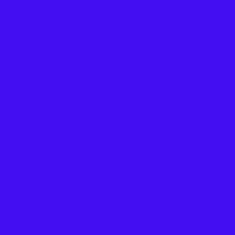

            Blue



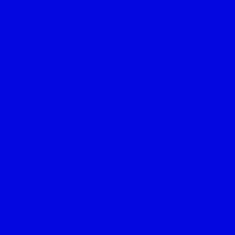

            Blue



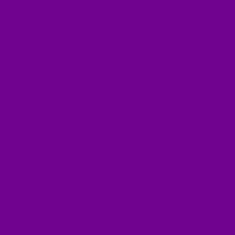

            Purple



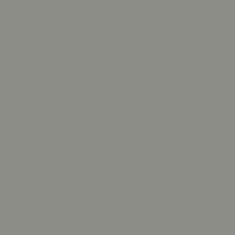

            Grey



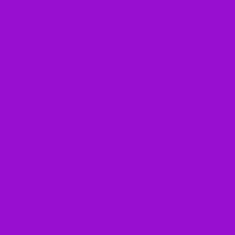

            Purple



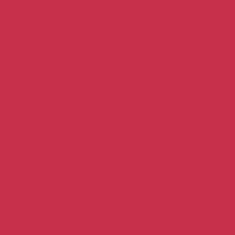

            Red



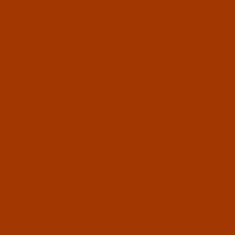

            Brown



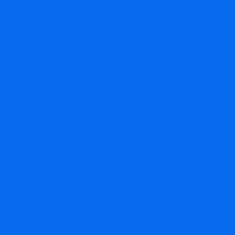

            Blue



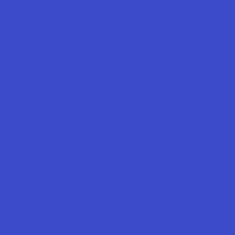

            Blue



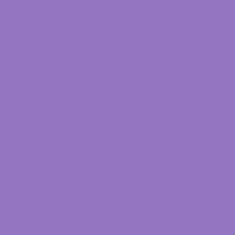

            Purple



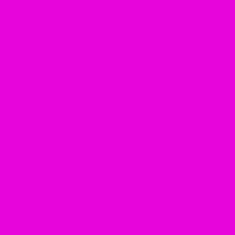

            Pink



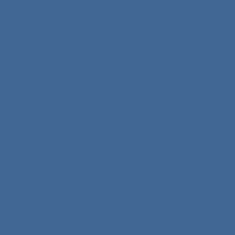

            Blue



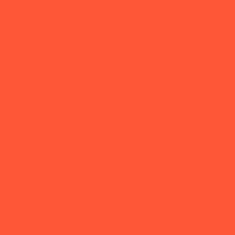

            Orange



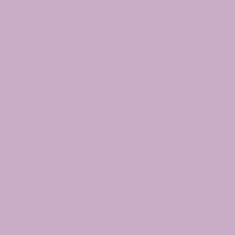

            Purple



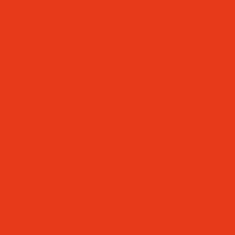

            Red



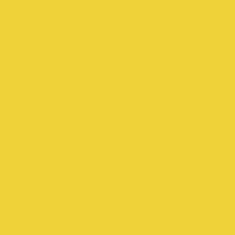

            Yellow



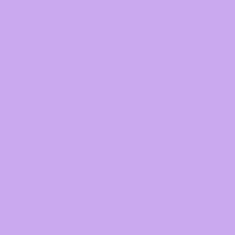

            Purple



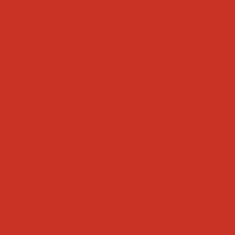

            Red



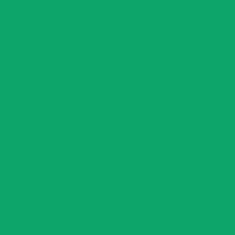

            Green



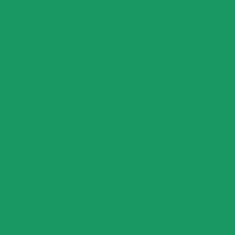

            Green



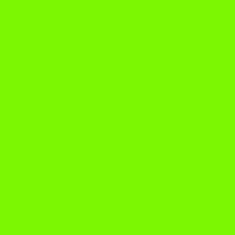

            Green



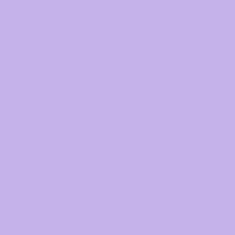

            Purple



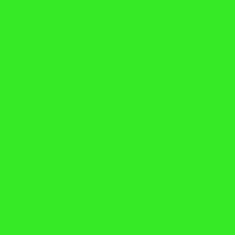

            Green



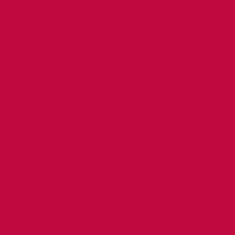

            Red



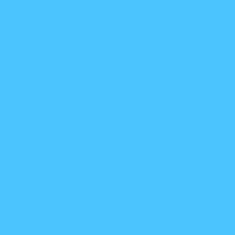

            Blue



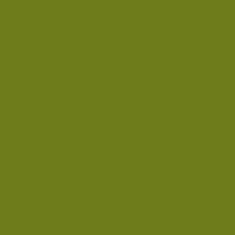

            Green



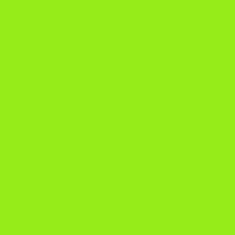

            Green



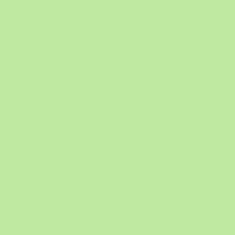

            Green



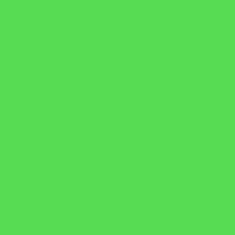

            Green



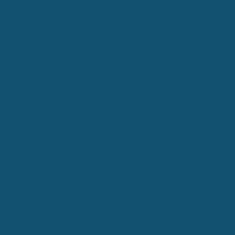

            Blue



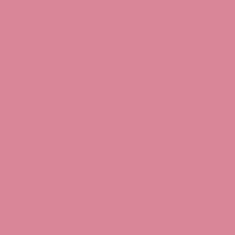

            Pink



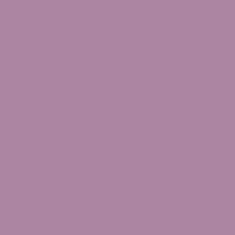

            Purple



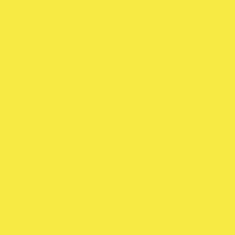

            Yellow



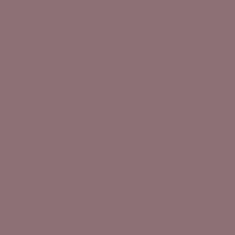

            Brown



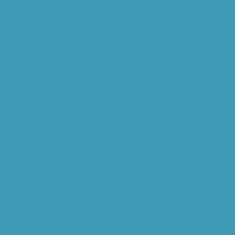

            Blue



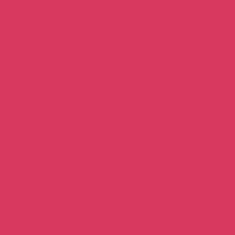

            Red



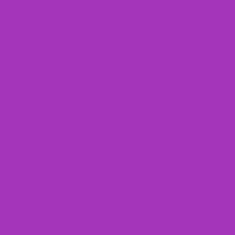

            Purple



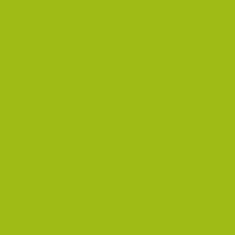

            Green



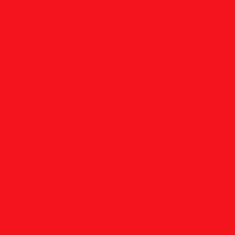

            Red



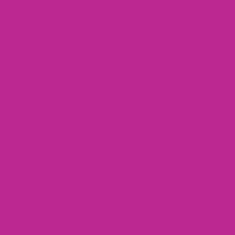

            Pink



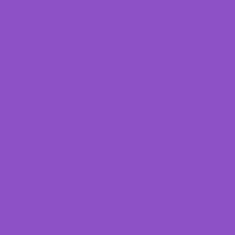

            Purple



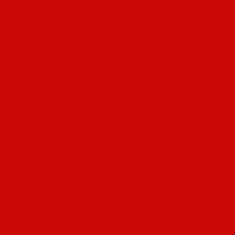

            Red



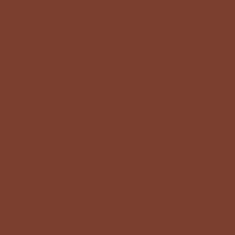

            Brown



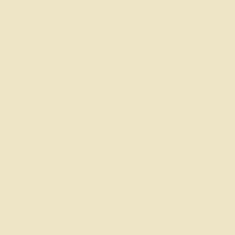

            White



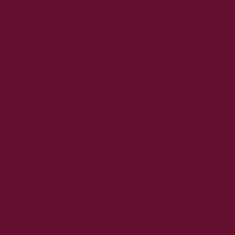

            Brown



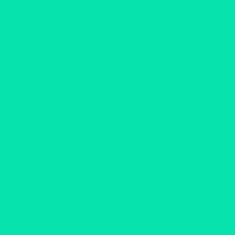

            Green



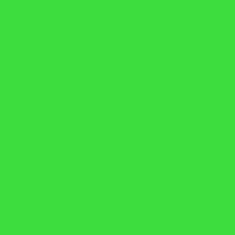

            Green



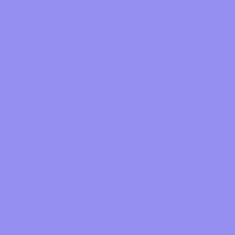

            Blue



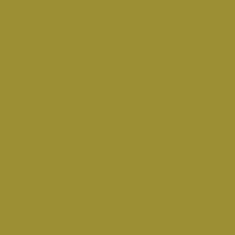

            Green



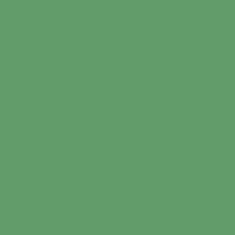

            Green



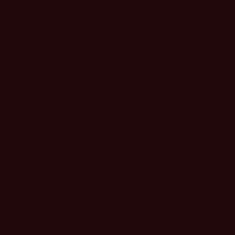

            Brown



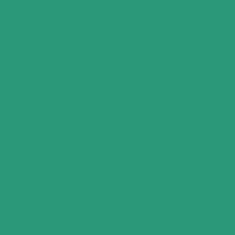

            Green



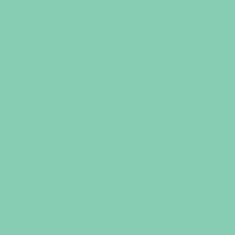

            Green



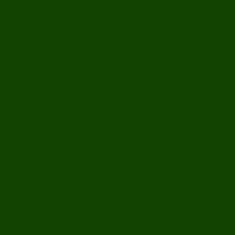

            Green



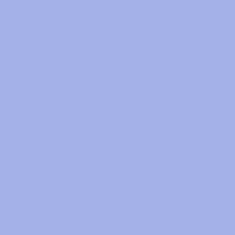

            Blue



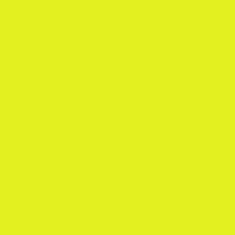

            Yellow



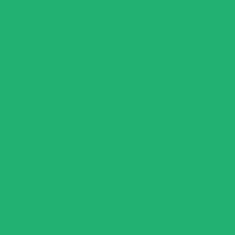

            Green



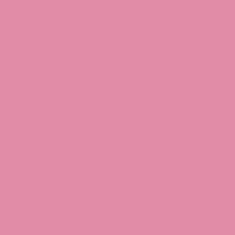

            Pink



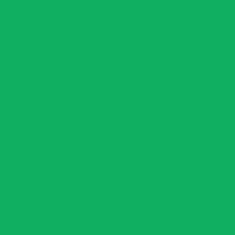

            Green



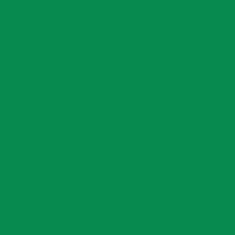

            Green



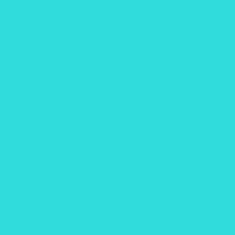

            Blue



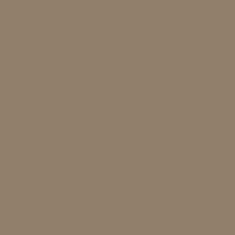

            Brown



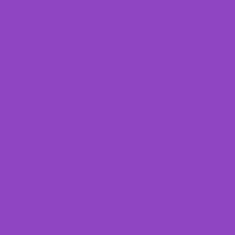

            Purple



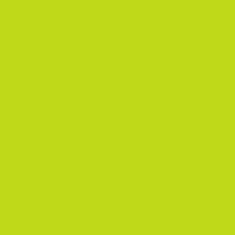

            Yellow



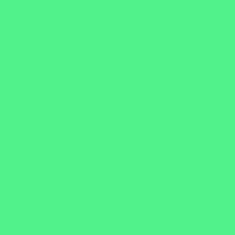

            Green



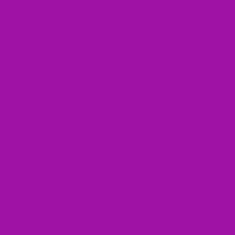

            Purple



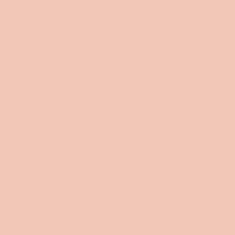

            Orange



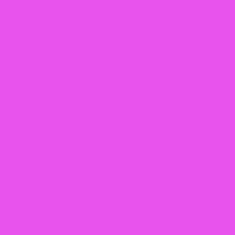

            Pink



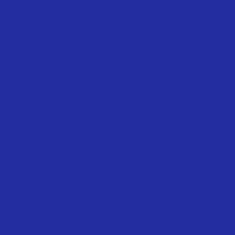

            Blue



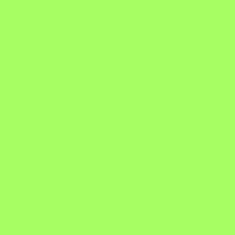

            Green



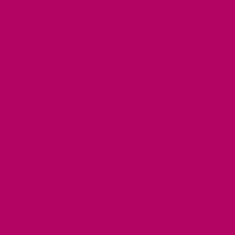

            Pink



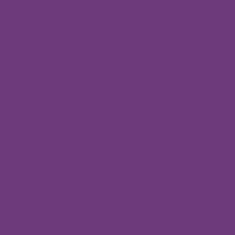

            Purple



In [ ]:
# User input for number of images to be classified
n = int(input('Enter number of images to be classified: '))
print() #blank line for spacing
#predicting from loaded trained_model
for i in range(n) :
    img = create_image(235,235) #(235,235) is the (width,heigth) of the image
    rgb = get_pixel(img,200,200) # any pixel within the image is given
    rgb = np.asarray(rgb) #rgb to numpy array
    input_rgb = np.reshape(rgb, (-1,3)) #reshaping as per input to ANN model
    display(img)
    color_class_confidence = model.predict(input_rgb) # Output of layer is in terms of Confidence of the 11 classes
    color_index = np.argmax(color_class_confidence, axis=1) #finding the color_class index from confidence
    color = color_dict[int(color_index)]
    print('            ' + color)
    print()